<h1> Project Objective: </h1>
1. Read the data set
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into training and test sets ( 2.5 points)
5. Normalize the train and test data (5 points)
6. Initialize & build the model (10 points)
7. Predict the results using 0.5 as a threshold (5 points)
8. Print the Accuracy score and confusion matrix (2.5 points)

In [62]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print(tf.__version__)
tf.random.set_seed(423444)

2.1.0


# 1. Read the data set

In [31]:
bank = pd.read_csv("bank.csv")
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 2. Drop the columns which are unique for all users like IDs

In [33]:
bank.drop(['RowNumber','CustomerId','Surname'],inplace= True, axis = 1)

In [34]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


# 3. Distinguish the feature and target set (2.5 points)

Column "Exited" is the target column for this problem as it is related to churn prediction. Rest all are features.
Some of the preprocessing are carried out below to prepare the data for training

In [35]:
bank['Exited'].value_counts()  #Class is imbalanced. So we use SMOTE to balance it.

0    7963
1    2037
Name: Exited, dtype: int64

In [36]:
#Performing label encoding
bank['Gender'] = LabelEncoder().fit_transform(bank['Gender'])       
bank['Geography'] = LabelEncoder().fit_transform(bank['Geography'])

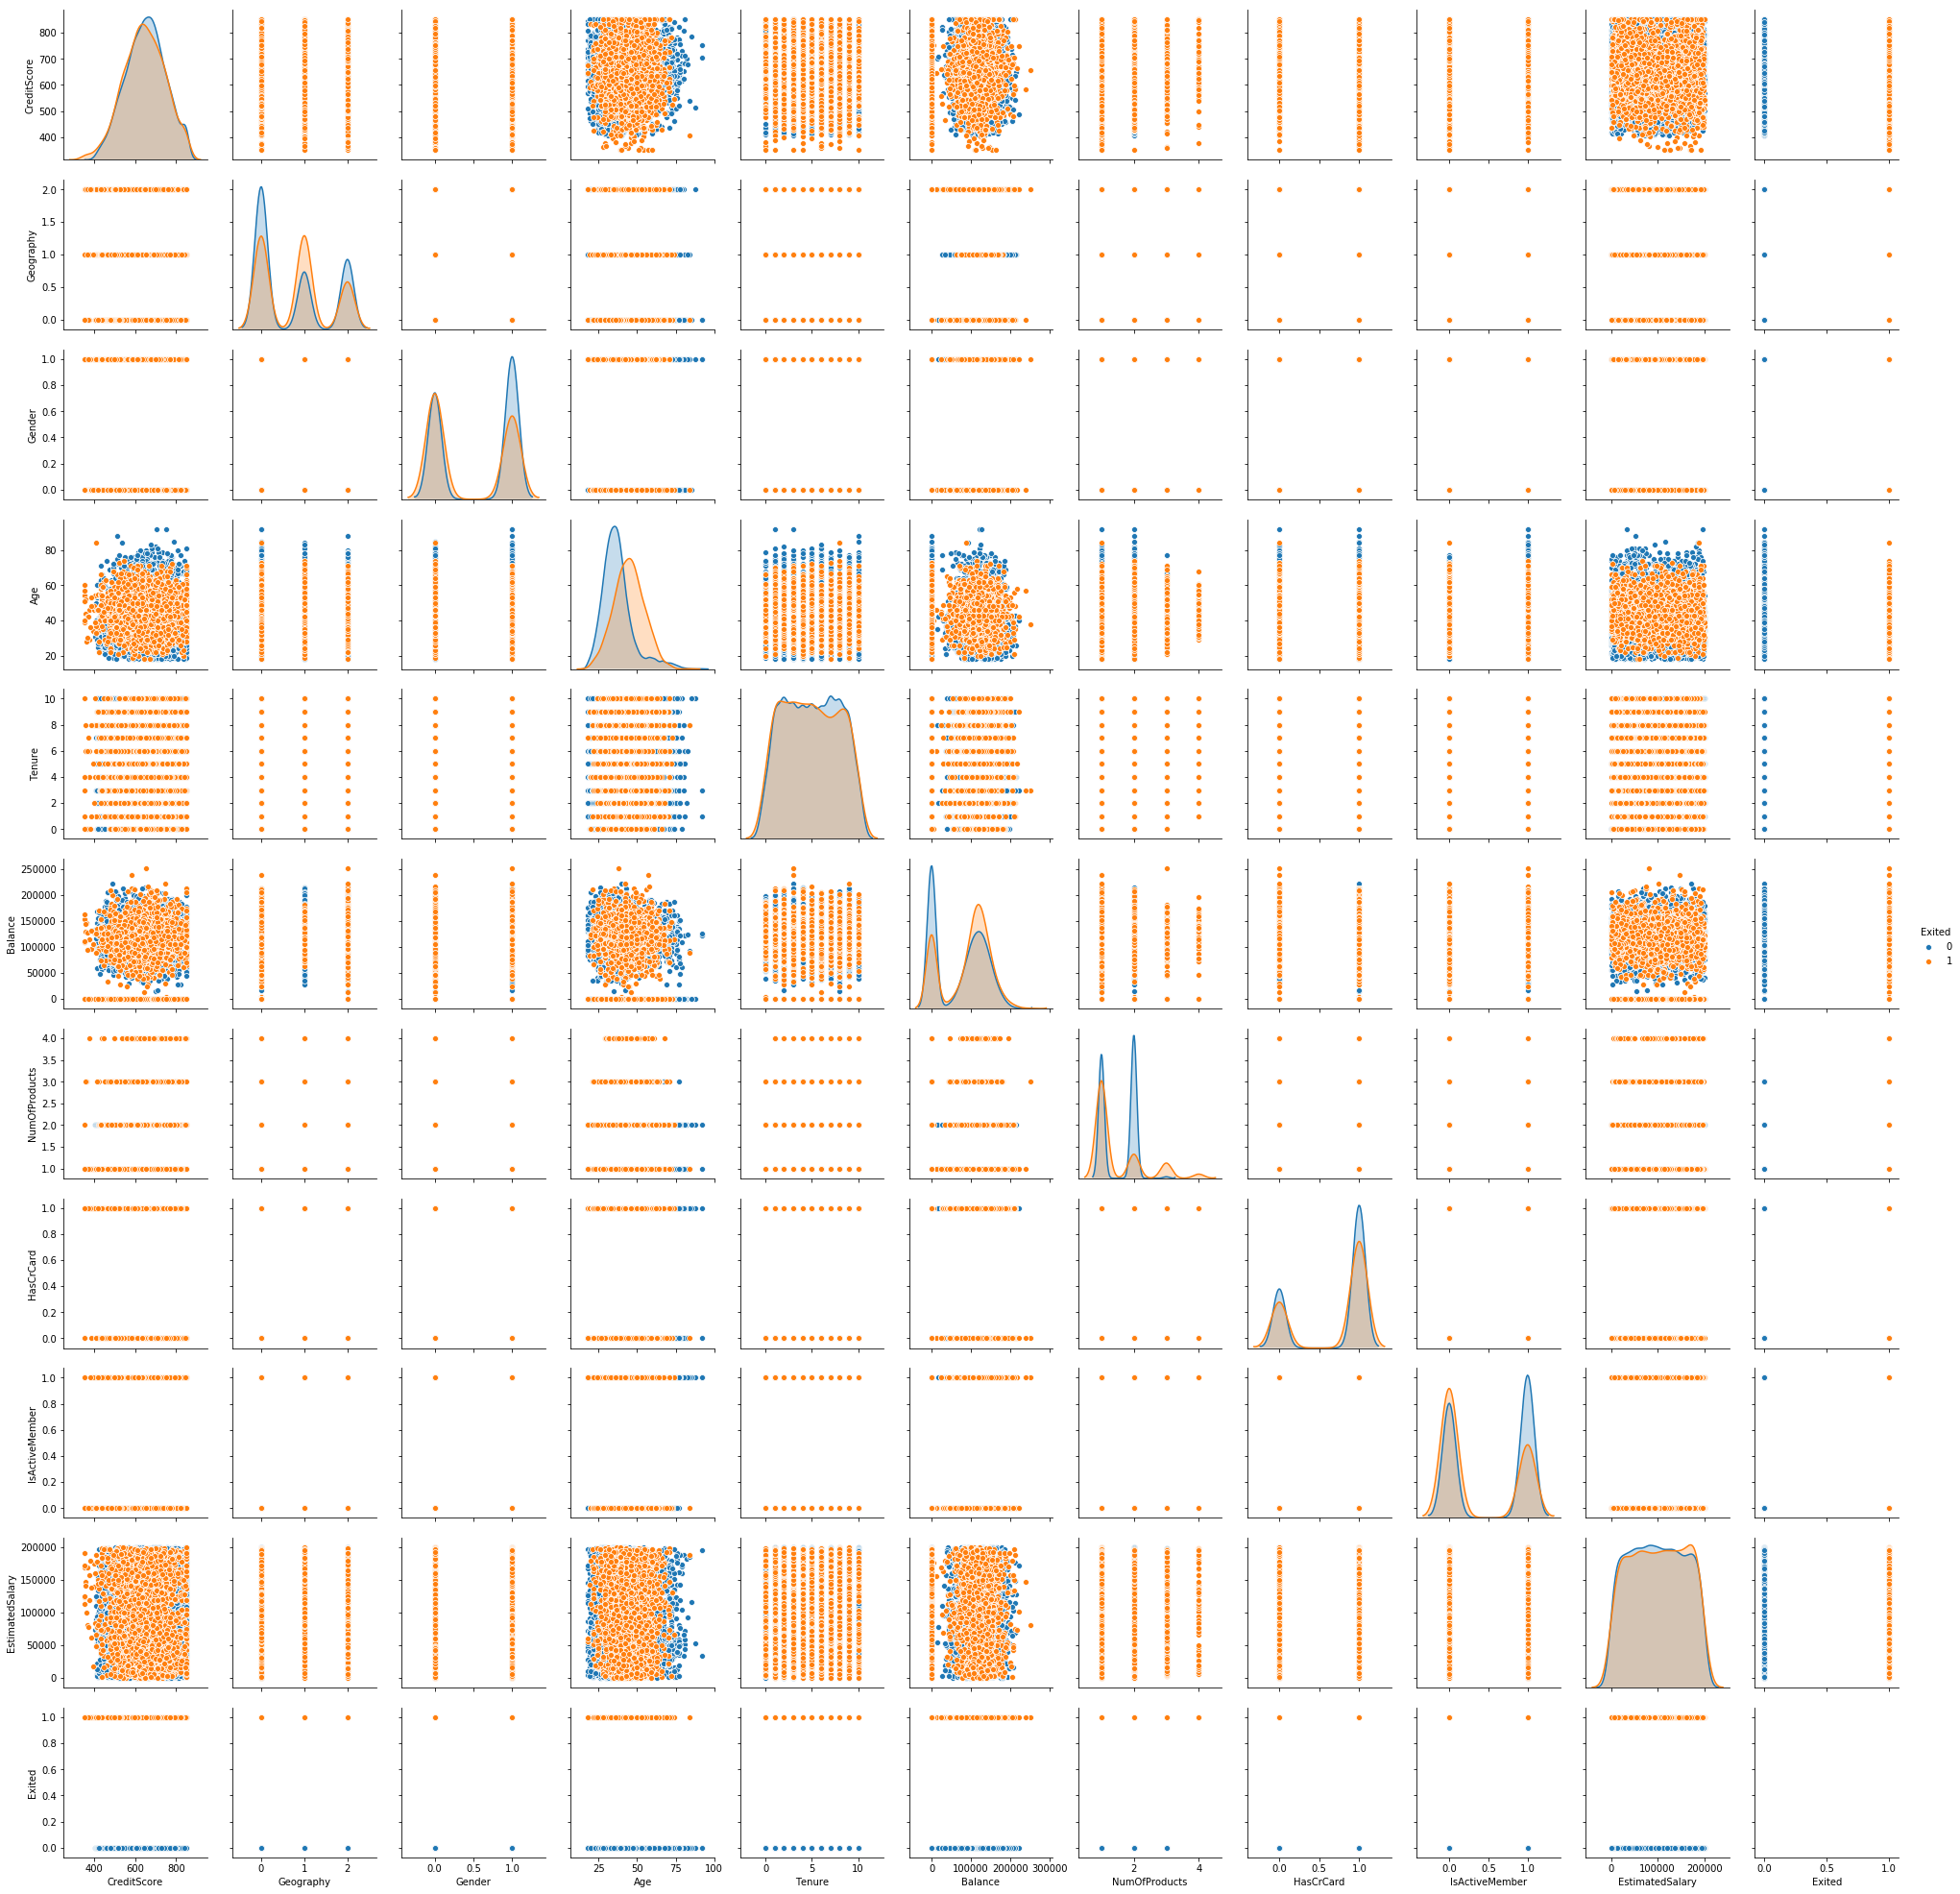

In [37]:
sns.pairplot(bank, hue = 'Exited')  #Lot of overlappings and correlation is bad. 

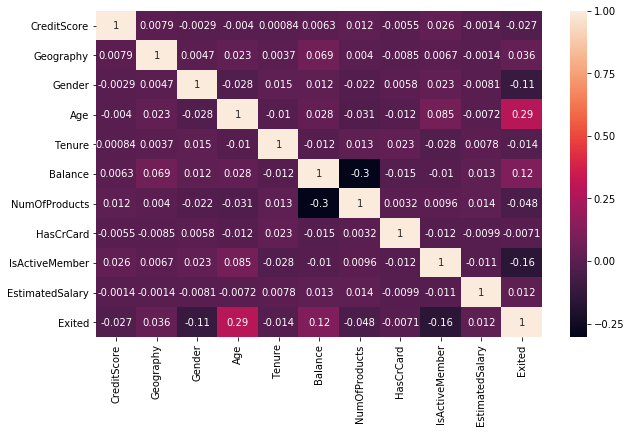

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.heatmap(bank.corr(),annot = True)

In [38]:
Ohe = OneHotEncoder()
Geo_code = pd.DataFrame(Ohe.fit_transform(bank[['Geography']]).toarray(),columns= ['G_France','G_Germany','G_Spain'])
NProd = pd.DataFrame(Ohe.fit_transform(bank[['NumOfProducts']]).toarray(),columns= ['P_One','P_Two','P_Three','P_Four'])
bank[['G_France','G_Germany','G_Spain']] = Geo_code
bank[['P_One','P_Two','P_Three','P_Four']] = NProd
bank.tail()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,G_France,G_Germany,G_Spain,P_One,P_Two,P_Three,P_Four
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
bank.drop(['Geography','NumOfProducts'],axis = 1,inplace = True)

In [40]:
bank.shape

(10000, 16)

# 4. Divide the data set into training and test sets


In [41]:
X = bank.iloc[:,:-1]
y = bank.iloc[:,-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=32)
ytest_Org = ytest.copy()
print("Before applying SMOTE",Xtrain.shape,ytrain.shape)
Xtrain,ytrain = SMOTE().fit_resample(Xtrain, ytrain)
print("After applying SMOTE",Xtrain.shape,ytrain.shape)
print("One hot encoding for target variable")
ytrain = tf.keras.utils.to_categorical(ytrain,num_classes = 2)
ytest = tf.keras.utils.to_categorical(ytest,num_classes = 2)
print(ytrain.shape,ytest.shape)

Before applying SMOTE (8000, 15) (8000,)
After applying SMOTE (15908, 15) (15908,)
One hot encoding for target variable
(15908, 2) (2000, 2)


In [42]:
Xtrain.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,G_France,G_Germany,G_Spain,P_One,P_Two,P_Three
0,530,0,41,4,0.00,0,1,147606.71,0,0.0,0.0,1.0,0.0,1.0,0.0
1,618,0,40,0,0.00,1,0,119059.13,0,1.0,0.0,0.0,1.0,0.0,0.0
2,713,0,59,3,0.00,1,1,62700.08,0,1.0,0.0,0.0,0.0,1.0,0.0
3,461,0,35,8,0.00,1,0,132295.95,0,0.0,0.0,1.0,1.0,0.0,0.0
4,758,1,32,4,162657.64,1,1,115525.13,0,0.0,1.0,0.0,0.0,1.0,0.0


# 5. Normalize the train and test data (5 points)

In [43]:
MinMaxSc = MinMaxScaler()
Xtrains = MinMaxSc.fit_transform(Xtrain)
Xtests = MinMaxSc.transform(Xtest)

In [44]:
Xtrains.shape

(15908, 15)

In [17]:
Xtrains

array([[0.36      , 0.        , 0.31081081, ..., 0.        , 1.        ,
        0.        ],
       [0.536     , 0.        , 0.2972973 , ..., 1.        , 0.        ,
        0.        ],
       [0.726     , 0.        , 0.55405405, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.284     , 0.        , 0.33783784, ..., 0.        , 0.        ,
        0.        ],
       [0.448     , 0.        , 0.32432432, ..., 0.        , 0.        ,
        0.        ],
       [0.52      , 0.        , 0.32432432, ..., 0.        , 0.        ,
        0.        ]])

# 6. Initialize & build the model (10 points)                                                            7. Predict the results using 0.5 as a threshold (5 points)

- Used binaryAccuracy which uses 0.5 as threshold

In [63]:
inputshape = Xtrains.shape[1:]
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, input_shape=inputshape, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(60, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(2, activation='sigmoid')
])
print("Model Summary")
print(model1.summary())
model1.compile(optimizer=tf.keras.optimizers.SGD(lr = 0.03),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy()])
modelhist = model1.fit(Xtrains,ytrain,epochs = 130,validation_data = (Xtests,ytest))
model1.evaluate(Xtests,ytest, verbose = 1)

Model Summary
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               1600      
_________________________________________________________________
dense_46 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_47 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 62        
Total params: 9,792
Trainable params: 9,792
Non-trainable params: 0
_____________________________________

15908/15908 [==============================] - 1s 88us/sample - loss: 0.0022 - binary_accuracy: 0.9992 - val_loss: 7.6954e-05 - val_binary_accuracy: 1.0000
Epoch 43/130
15908/15908 [==============================] - 1s 88us/sample - loss: 0.0020 - binary_accuracy: 0.9991 - val_loss: 5.3299e-05 - val_binary_accuracy: 1.0000
Epoch 44/130
15908/15908 [==============================] - 1s 87us/sample - loss: 0.0018 - binary_accuracy: 0.9994 - val_loss: 7.5622e-05 - val_binary_accuracy: 1.0000
Epoch 45/130
15908/15908 [==============================] - 1s 88us/sample - loss: 0.0022 - binary_accuracy: 0.9992 - val_loss: 1.2729e-04 - val_binary_accuracy: 1.0000
Epoch 46/130
15908/15908 [==============================] - 1s 88us/sample - loss: 0.0019 - binary_accuracy: 0.9996 - val_loss: 3.7552e-05 - val_binary_accuracy: 1.0000
Epoch 47/130
15908/15908 [==============================] - 1s 88us/sample - loss: 0.0021 - binary_accuracy: 0.9992 - val_loss: 3.0672e-05 - val_binary_accuracy: 1.0000

15908/15908 [==============================] - 1s 89us/sample - loss: 8.6564e-04 - binary_accuracy: 0.9998 - val_loss: 2.2812e-05 - val_binary_accuracy: 1.0000
Epoch 91/130
15908/15908 [==============================] - 1s 88us/sample - loss: 5.3844e-04 - binary_accuracy: 0.9997 - val_loss: 3.1147e-05 - val_binary_accuracy: 1.0000
Epoch 92/130
15908/15908 [==============================] - 1s 86us/sample - loss: 4.9404e-04 - binary_accuracy: 0.9999 - val_loss: 4.1746e-05 - val_binary_accuracy: 1.0000
Epoch 93/130
15908/15908 [==============================] - 1s 88us/sample - loss: 9.9357e-04 - binary_accuracy: 0.9997 - val_loss: 3.0093e-05 - val_binary_accuracy: 1.0000
Epoch 94/130
15908/15908 [==============================] - 1s 88us/sample - loss: 5.0629e-04 - binary_accuracy: 0.9999 - val_loss: 4.1203e-05 - val_binary_accuracy: 1.0000
Epoch 95/130
15908/15908 [==============================] - 1s 88us/sample - loss: 0.0012 - binary_accuracy: 0.9996 - val_loss: 2.3253e-05 - val_bin

[4.043999208606408e-05, 1.0]

In [64]:
model1.evaluate(Xtests,ytest, verbose = 1)
model1.save("BankChurnPredictModel1")

2000/2000 [==============================] - 0s 52us/sample - loss: 4.0440e-05 - binary_accuracy: 1.0000
INFO:tensorflow:Assets written to: BankChurnPredictModel1\assets


In [65]:
modelhist.params, modelhist.history

({'batch_size': 32,
  'do_validation': True,
  'epochs': 130,
  'metrics': ['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'],
  'samples': 15908,
  'steps': 498,
  'verbose': 0},
 {'binary_accuracy': [0.68990445,
   0.88857806,
   0.9465678,
   0.9625974,
   0.9734096,
   0.9801672,
   0.9856362,
   0.9874277,
   0.9904451,
   0.99126226,
   0.9925195,
   0.993211,
   0.99421674,
   0.99585116,
   0.9949082,
   0.99644834,
   0.99669975,
   0.9982399,
   0.99594545,
   0.99698263,
   0.9974855,
   0.9974227,
   0.9980513,
   0.9982399,
   0.99858564,
   0.99880564,
   0.99874276,
   0.99883705,
   0.99886847,
   0.9983656,
   0.9992771,
   0.99883705,
   0.99899423,
   0.99943423,
   0.99893135,
   0.9991828,
   0.9996228,
   0.99896276,
   0.99911994,
   0.99956,
   0.99867994,
   0.99924564,
   0.9990885,
   0.99943423,
   0.99915135,
   0.99956,
   0.99924564,
   0.9995285,
   0.99915135,
   0.9991828,
   0.9996857,
   0.9993085,
   0.9996228,
   0.99965423,
   0.99978,

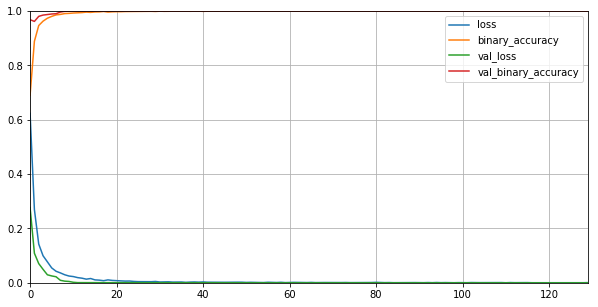

In [66]:
pd.DataFrame(modelhist.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# 8. Print the Accuracy score and confusion matrix (2.5 points)

In [67]:
yPred = model1.predict_classes(Xtests, verbose=0)
tf.math.confusion_matrix(ytest_Org, yPred,num_classes=2)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1986,    0],
       [   0,   14]])>

In [68]:
print("Accuracy Score" , accuracy_score(ytest_Org, yPred))

Accuracy Score 1.0


Experimenting with RandomSearch 


In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
param_dist = {
    "nhidden" : [1,2,3,4],
    "n_neu": np.arange(5,30),
    "learning_rate": [0.04,1.2,2.0],
}

In [71]:
def modelfunc(nhidden=2,n_neu = 15, learning_rate = 5.15, inshape=inputshape,hid_act = "relu",o_act = "sigmoid"):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = inshape))
    for i in range(nhidden):
        model.add(tf.keras.layers.Dense(n_neu,activation = hid_act))
    model.add(tf.keras.layers.Dense(2,activation = o_act))
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [72]:
gen_model = tf.keras.wrappers.scikit_learn.KerasClassifier(modelfunc)

Rscv = RandomizedSearchCV(gen_model,param_dist,n_iter=10,cv=5)
Rscv.fit(Xtrains,ytrain,epochs = 100,validation_data = (Xtests,ytest),callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])

Train on 12726 samples, validate on 2000 samples
Epoch 1/100
12726/12726 [==============================] - 2s 120us/sample - loss: 0.4762 - accuracy: 0.8261 - val_loss: 0.2732 - val_accuracy: 0.8832
Epoch 2/100
12726/12726 [==============================] - 1s 76us/sample - loss: 0.1253 - accuracy: 0.9680 - val_loss: 0.1325 - val_accuracy: 0.9365
Epoch 3/100
12726/12726 [==============================] - 1s 81us/sample - loss: 0.0633 - accuracy: 0.9855 - val_loss: 0.0820 - val_accuracy: 0.9725
Epoch 4/100
12726/12726 [==============================] - 1s 76us/sample - loss: 0.0422 - accuracy: 0.9905 - val_loss: 0.0615 - val_accuracy: 0.9775
Epoch 5/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0312 - accuracy: 0.9931 - val_loss: 0.0430 - val_accuracy: 0.9840
Epoch 6/100
12726/12726 [==============================] - 1s 79us/sample - loss: 0.0242 - accuracy: 0.9944 - val_loss: 0.0380 - val_accuracy: 0.9852
Epoch 7/100
12726/12726 [=========================

12726/12726 [==============================] - 1s 76us/sample - loss: 6.4616e-04 - accuracy: 1.0000 - val_loss: 8.0321e-04 - val_accuracy: 1.0000
Epoch 55/100
12726/12726 [==============================] - 1s 77us/sample - loss: 6.3021e-04 - accuracy: 1.0000 - val_loss: 7.8571e-04 - val_accuracy: 1.0000
Epoch 56/100
12726/12726 [==============================] - 1s 73us/sample - loss: 6.1487e-04 - accuracy: 1.0000 - val_loss: 7.6932e-04 - val_accuracy: 1.0000
Epoch 57/100
12726/12726 [==============================] - 1s 75us/sample - loss: 6.0021e-04 - accuracy: 1.0000 - val_loss: 7.4814e-04 - val_accuracy: 1.0000
Epoch 58/100
12726/12726 [==============================] - 1s 77us/sample - loss: 5.8622e-04 - accuracy: 1.0000 - val_loss: 7.3388e-04 - val_accuracy: 1.0000
Epoch 59/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.7278e-04 - accuracy: 1.0000 - val_loss: 7.1222e-04 - val_accuracy: 1.0000
Epoch 60/100
12726/12726 [==============================] -

Epoch 5/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0394 - accuracy: 0.9917 - val_loss: 0.0538 - val_accuracy: 0.9820
Epoch 6/100
12726/12726 [==============================] - 1s 79us/sample - loss: 0.0301 - accuracy: 0.9931 - val_loss: 0.0465 - val_accuracy: 0.9847
Epoch 7/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0229 - accuracy: 0.9944 - val_loss: 0.0338 - val_accuracy: 0.9868
Epoch 8/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0252 - val_accuracy: 0.9890
Epoch 9/100
12726/12726 [==============================] - 1s 79us/sample - loss: 0.0138 - accuracy: 0.9968 - val_loss: 0.0190 - val_accuracy: 0.9918
Epoch 10/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0110 - accuracy: 0.9980 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 11/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0090 - accurac

12726/12726 [==============================] - 1s 81us/sample - loss: 5.8680e-04 - accuracy: 1.0000 - val_loss: 7.4908e-04 - val_accuracy: 1.0000
Epoch 59/100
12726/12726 [==============================] - 1s 77us/sample - loss: 5.7343e-04 - accuracy: 1.0000 - val_loss: 7.3259e-04 - val_accuracy: 1.0000
Epoch 60/100
12726/12726 [==============================] - 1s 82us/sample - loss: 5.6061e-04 - accuracy: 1.0000 - val_loss: 7.1208e-04 - val_accuracy: 1.0000
Epoch 61/100
12726/12726 [==============================] - 1s 81us/sample - loss: 5.4836e-04 - accuracy: 1.0000 - val_loss: 6.9913e-04 - val_accuracy: 1.0000
Epoch 62/100
12726/12726 [==============================] - 1s 78us/sample - loss: 5.3654e-04 - accuracy: 1.0000 - val_loss: 6.8290e-04 - val_accuracy: 1.0000
Epoch 63/100
12726/12726 [==============================] - 1s 77us/sample - loss: 5.2524e-04 - accuracy: 1.0000 - val_loss: 6.6918e-04 - val_accuracy: 1.0000
Epoch 64/100
12726/12726 [==============================] -

12726/12726 [==============================] - 1s 78us/sample - loss: 0.0107 - accuracy: 0.9993 - val_loss: 0.0108 - val_accuracy: 0.9990
Epoch 10/100
12726/12726 [==============================] - 1s 79us/sample - loss: 0.0087 - accuracy: 0.9998 - val_loss: 0.0087 - val_accuracy: 0.9998
Epoch 11/100
12726/12726 [==============================] - 1s 73us/sample - loss: 0.0073 - accuracy: 0.9999 - val_loss: 0.0076 - val_accuracy: 0.9998
Epoch 12/100
12726/12726 [==============================] - 1s 78us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9998
Epoch 13/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 14/100
12726/12726 [==============================] - 1s 78us/sample - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 15/100
12726/12726 [==============================] - 1s 79us/sample - loss: 0.0041 - accuracy: 1.000

12726/12726 [==============================] - 1s 78us/sample - loss: 5.1127e-04 - accuracy: 1.0000 - val_loss: 5.1237e-04 - val_accuracy: 1.0000
Epoch 63/100
12726/12726 [==============================] - 1s 80us/sample - loss: 5.0068e-04 - accuracy: 1.0000 - val_loss: 5.0254e-04 - val_accuracy: 1.0000
Epoch 64/100
12726/12726 [==============================] - 1s 81us/sample - loss: 4.9047e-04 - accuracy: 1.0000 - val_loss: 4.9162e-04 - val_accuracy: 1.0000
Epoch 65/100
12726/12726 [==============================] - 1s 83us/sample - loss: 4.8064e-04 - accuracy: 1.0000 - val_loss: 4.8071e-04 - val_accuracy: 1.0000
Epoch 66/100
12726/12726 [==============================] - 1s 76us/sample - loss: 4.7120e-04 - accuracy: 1.0000 - val_loss: 4.7197e-04 - val_accuracy: 1.0000
Epoch 67/100
12726/12726 [==============================] - 1s 76us/sample - loss: 4.6207e-04 - accuracy: 1.0000 - val_loss: 4.6320e-04 - val_accuracy: 1.0000
Epoch 68/100
12726/12726 [==============================] -

12727/12727 [==============================] - 1s 76us/sample - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 14/100
12727/12727 [==============================] - 1s 80us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 15/100
12727/12727 [==============================] - 1s 80us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 16/100
12727/12727 [==============================] - 1s 80us/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 17/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 18/100
12727/12727 [==============================] - 1s 82us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 19/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0026 - accuracy: 1.000

Epoch 66/100
12727/12727 [==============================] - 1s 73us/sample - loss: 4.6896e-04 - accuracy: 1.0000 - val_loss: 3.5993e-04 - val_accuracy: 1.0000
Epoch 67/100
12727/12727 [==============================] - 1s 78us/sample - loss: 4.6002e-04 - accuracy: 1.0000 - val_loss: 3.5311e-04 - val_accuracy: 1.0000
Epoch 68/100
12727/12727 [==============================] - 1s 77us/sample - loss: 4.5138e-04 - accuracy: 1.0000 - val_loss: 3.4557e-04 - val_accuracy: 1.0000
Epoch 69/100
12727/12727 [==============================] - 1s 76us/sample - loss: 4.4305e-04 - accuracy: 1.0000 - val_loss: 3.3957e-04 - val_accuracy: 1.0000
Epoch 70/100
12727/12727 [==============================] - 1s 76us/sample - loss: 4.3499e-04 - accuracy: 1.0000 - val_loss: 3.3345e-04 - val_accuracy: 1.0000
Epoch 71/100
12727/12727 [==============================] - 1s 74us/sample - loss: 4.2720e-04 - accuracy: 1.0000 - val_loss: 3.2722e-04 - val_accuracy: 1.0000
Epoch 72/100
12727/12727 [====================

12727/12727 [==============================] - 1s 77us/sample - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 18/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 19/100
12727/12727 [==============================] - 1s 81us/sample - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 20/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 21/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 22/100
12727/12727 [==============================] - 1s 75us/sample - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 23/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0087 - accuracy: 1.000

12727/12727 [==============================] - 1s 77us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.9422e-04 - val_accuracy: 1.0000
Epoch 71/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.8764e-04 - val_accuracy: 1.0000
Epoch 72/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.8152e-04 - val_accuracy: 1.0000
Epoch 73/100
12727/12727 [==============================] - 1s 77us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.7521e-04 - val_accuracy: 1.0000
Epoch 74/100
12727/12727 [==============================] - 1s 75us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.6869e-04 - val_accuracy: 1.0000
Epoch 75/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.6306e-04 - val_accuracy: 1.0000
Epoch 76/100
12727/12727 [==============================] - 1s 78us/sample - loss: 

Epoch 22/100
12726/12726 [==============================] - 1s 85us/sample - loss: 1.1181e-04 - accuracy: 1.0000 - val_loss: 1.2146e-04 - val_accuracy: 1.0000
Epoch 23/100
12726/12726 [==============================] - 1s 91us/sample - loss: 1.0512e-04 - accuracy: 1.0000 - val_loss: 1.1274e-04 - val_accuracy: 1.0000
Epoch 24/100
12726/12726 [==============================] - 1s 86us/sample - loss: 9.9157e-05 - accuracy: 1.0000 - val_loss: 1.0656e-04 - val_accuracy: 1.0000
Epoch 25/100
12726/12726 [==============================] - 1s 86us/sample - loss: 9.3761e-05 - accuracy: 1.0000 - val_loss: 1.0056e-04 - val_accuracy: 1.0000
Epoch 26/100
12726/12726 [==============================] - 1s 83us/sample - loss: 8.8879e-05 - accuracy: 1.0000 - val_loss: 9.5966e-05 - val_accuracy: 1.0000
Epoch 27/100
12726/12726 [==============================] - 1s 86us/sample - loss: 8.4459e-05 - accuracy: 1.0000 - val_loss: 9.1897e-05 - val_accuracy: 1.0000
Epoch 28/100
12726/12726 [====================

12726/12726 [==============================] - 1s 82us/sample - loss: 2.3364e-05 - accuracy: 1.0000 - val_loss: 2.5179e-05 - val_accuracy: 1.0000
Epoch 74/100
12726/12726 [==============================] - 1s 84us/sample - loss: 2.2971e-05 - accuracy: 1.0000 - val_loss: 2.4721e-05 - val_accuracy: 1.0000
Epoch 75/100
12726/12726 [==============================] - 1s 82us/sample - loss: 2.2590e-05 - accuracy: 1.0000 - val_loss: 2.4269e-05 - val_accuracy: 1.0000
Epoch 76/100
12726/12726 [==============================] - 1s 84us/sample - loss: 2.2222e-05 - accuracy: 1.0000 - val_loss: 2.3864e-05 - val_accuracy: 1.0000
Epoch 77/100
12726/12726 [==============================] - 1s 80us/sample - loss: 2.1864e-05 - accuracy: 1.0000 - val_loss: 2.3495e-05 - val_accuracy: 1.0000
Epoch 78/100
12726/12726 [==============================] - 1s 83us/sample - loss: 2.1516e-05 - accuracy: 1.0000 - val_loss: 2.3142e-05 - val_accuracy: 1.0000
Epoch 79/100
12726/12726 [==============================] -

12726/12726 [==============================] - 1s 81us/sample - loss: 9.7718e-05 - accuracy: 1.0000 - val_loss: 1.8893e-04 - val_accuracy: 1.0000
Epoch 25/100
12726/12726 [==============================] - 1s 83us/sample - loss: 9.2364e-05 - accuracy: 1.0000 - val_loss: 1.7499e-04 - val_accuracy: 1.0000
Epoch 26/100
12726/12726 [==============================] - 1s 83us/sample - loss: 8.7577e-05 - accuracy: 1.0000 - val_loss: 1.6681e-04 - val_accuracy: 1.0000
Epoch 27/100
12726/12726 [==============================] - 1s 83us/sample - loss: 8.3174e-05 - accuracy: 1.0000 - val_loss: 1.5937e-04 - val_accuracy: 1.0000
Epoch 28/100
12726/12726 [==============================] - 1s 81us/sample - loss: 7.9179e-05 - accuracy: 1.0000 - val_loss: 1.5176e-04 - val_accuracy: 1.0000
Epoch 29/100
12726/12726 [==============================] - 1s 87us/sample - loss: 7.5519e-05 - accuracy: 1.0000 - val_loss: 1.4498e-04 - val_accuracy: 1.0000
Epoch 30/100
12726/12726 [==============================] -

12726/12726 [==============================] - 1s 88us/sample - loss: 2.2111e-05 - accuracy: 1.0000 - val_loss: 4.2383e-05 - val_accuracy: 1.0000
Epoch 76/100
12726/12726 [==============================] - 1s 85us/sample - loss: 2.1751e-05 - accuracy: 1.0000 - val_loss: 4.1731e-05 - val_accuracy: 1.0000
Epoch 77/100
12726/12726 [==============================] - 1s 86us/sample - loss: 2.1400e-05 - accuracy: 1.0000 - val_loss: 4.1011e-05 - val_accuracy: 1.0000
Epoch 78/100
12726/12726 [==============================] - 1s 83us/sample - loss: 2.1060e-05 - accuracy: 1.0000 - val_loss: 4.0366e-05 - val_accuracy: 1.0000
Epoch 79/100
12726/12726 [==============================] - 1s 82us/sample - loss: 2.0730e-05 - accuracy: 1.0000 - val_loss: 3.9728e-05 - val_accuracy: 1.0000
Epoch 80/100
12726/12726 [==============================] - 1s 84us/sample - loss: 2.0409e-05 - accuracy: 1.0000 - val_loss: 3.9162e-05 - val_accuracy: 1.0000
Epoch 81/100
12726/12726 [==============================] -

Epoch 26/100
12726/12726 [==============================] - 1s 81us/sample - loss: 7.9549e-05 - accuracy: 1.0000 - val_loss: 8.2685e-05 - val_accuracy: 1.0000
Epoch 27/100
12726/12726 [==============================] - 1s 81us/sample - loss: 7.5704e-05 - accuracy: 1.0000 - val_loss: 7.9407e-05 - val_accuracy: 1.0000
Epoch 28/100
12726/12726 [==============================] - 1s 82us/sample - loss: 7.2203e-05 - accuracy: 1.0000 - val_loss: 7.5312e-05 - val_accuracy: 1.0000
Epoch 29/100
12726/12726 [==============================] - 1s 79us/sample - loss: 6.8982e-05 - accuracy: 1.0000 - val_loss: 7.1959e-05 - val_accuracy: 1.0000
Epoch 30/100
12726/12726 [==============================] - 1s 81us/sample - loss: 6.6012e-05 - accuracy: 1.0000 - val_loss: 6.9063e-05 - val_accuracy: 1.0000
Epoch 31/100
12726/12726 [==============================] - 1s 81us/sample - loss: 6.3272e-05 - accuracy: 1.0000 - val_loss: 6.6233e-05 - val_accuracy: 1.0000
Epoch 32/100
12726/12726 [====================

12726/12726 [==============================] - 1s 81us/sample - loss: 2.0275e-05 - accuracy: 1.0000 - val_loss: 2.1368e-05 - val_accuracy: 1.0000
Epoch 78/100
12726/12726 [==============================] - 1s 81us/sample - loss: 1.9958e-05 - accuracy: 1.0000 - val_loss: 2.1042e-05 - val_accuracy: 1.0000
Epoch 79/100
12726/12726 [==============================] - 1s 81us/sample - loss: 1.9651e-05 - accuracy: 1.0000 - val_loss: 2.0727e-05 - val_accuracy: 1.0000
Epoch 80/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.9352e-05 - accuracy: 1.0000 - val_loss: 2.0400e-05 - val_accuracy: 1.0000
Epoch 81/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.9062e-05 - accuracy: 1.0000 - val_loss: 2.0096e-05 - val_accuracy: 1.0000
Epoch 82/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.8780e-05 - accuracy: 1.0000 - val_loss: 1.9804e-05 - val_accuracy: 1.0000
Epoch 83/100
12726/12726 [==============================] -

Epoch 28/100
12727/12727 [==============================] - 1s 87us/sample - loss: 7.5882e-05 - accuracy: 1.0000 - val_loss: 4.9229e-05 - val_accuracy: 1.0000
Epoch 29/100
12727/12727 [==============================] - 1s 86us/sample - loss: 7.2467e-05 - accuracy: 1.0000 - val_loss: 4.6924e-05 - val_accuracy: 1.0000
Epoch 30/100
12727/12727 [==============================] - 1s 86us/sample - loss: 6.9330e-05 - accuracy: 1.0000 - val_loss: 4.5183e-05 - val_accuracy: 1.0000
Epoch 31/100
12727/12727 [==============================] - 1s 86us/sample - loss: 6.6427e-05 - accuracy: 1.0000 - val_loss: 4.3349e-05 - val_accuracy: 1.0000
Epoch 32/100
12727/12727 [==============================] - 1s 89us/sample - loss: 6.3737e-05 - accuracy: 1.0000 - val_loss: 4.1341e-05 - val_accuracy: 1.0000
Epoch 33/100
12727/12727 [==============================] - 1s 83us/sample - loss: 6.1247e-05 - accuracy: 1.0000 - val_loss: 3.9923e-05 - val_accuracy: 1.0000
Epoch 34/100
12727/12727 [====================

12727/12727 [==============================] - 1s 84us/sample - loss: 2.0462e-05 - accuracy: 1.0000 - val_loss: 1.3327e-05 - val_accuracy: 1.0000
Epoch 80/100
12727/12727 [==============================] - 1s 82us/sample - loss: 2.0149e-05 - accuracy: 1.0000 - val_loss: 1.3131e-05 - val_accuracy: 1.0000
Epoch 81/100
12727/12727 [==============================] - 1s 82us/sample - loss: 1.9846e-05 - accuracy: 1.0000 - val_loss: 1.2934e-05 - val_accuracy: 1.0000
Epoch 82/100
12727/12727 [==============================] - 1s 84us/sample - loss: 1.9550e-05 - accuracy: 1.0000 - val_loss: 1.2742e-05 - val_accuracy: 1.0000
Epoch 83/100
12727/12727 [==============================] - 1s 84us/sample - loss: 1.9262e-05 - accuracy: 1.0000 - val_loss: 1.2547e-05 - val_accuracy: 1.0000
Epoch 84/100
12727/12727 [==============================] - 1s 85us/sample - loss: 1.8982e-05 - accuracy: 1.0000 - val_loss: 1.2366e-05 - val_accuracy: 1.0000
Epoch 85/100
12727/12727 [==============================] -

Epoch 30/100
12727/12727 [==============================] - 1s 84us/sample - loss: 7.2057e-05 - accuracy: 1.0000 - val_loss: 4.9039e-05 - val_accuracy: 1.0000
Epoch 31/100
12727/12727 [==============================] - 1s 84us/sample - loss: 6.9010e-05 - accuracy: 1.0000 - val_loss: 4.7155e-05 - val_accuracy: 1.0000
Epoch 32/100
12727/12727 [==============================] - 1s 84us/sample - loss: 6.6186e-05 - accuracy: 1.0000 - val_loss: 4.5001e-05 - val_accuracy: 1.0000
Epoch 33/100
12727/12727 [==============================] - 1s 83us/sample - loss: 6.3571e-05 - accuracy: 1.0000 - val_loss: 4.3365e-05 - val_accuracy: 1.0000
Epoch 34/100
12727/12727 [==============================] - 1s 84us/sample - loss: 6.1139e-05 - accuracy: 1.0000 - val_loss: 4.1759e-05 - val_accuracy: 1.0000
Epoch 35/100
12727/12727 [==============================] - 1s 84us/sample - loss: 5.8870e-05 - accuracy: 1.0000 - val_loss: 4.0115e-05 - val_accuracy: 1.0000
Epoch 36/100
12727/12727 [====================

12727/12727 [==============================] - 1s 81us/sample - loss: 2.0377e-05 - accuracy: 1.0000 - val_loss: 1.3902e-05 - val_accuracy: 1.0000
Epoch 82/100
12727/12727 [==============================] - 1s 80us/sample - loss: 2.0071e-05 - accuracy: 1.0000 - val_loss: 1.3692e-05 - val_accuracy: 1.0000
Epoch 83/100
12727/12727 [==============================] - 1s 82us/sample - loss: 1.9773e-05 - accuracy: 1.0000 - val_loss: 1.3480e-05 - val_accuracy: 1.0000
Epoch 84/100
12727/12727 [==============================] - 1s 81us/sample - loss: 1.9483e-05 - accuracy: 1.0000 - val_loss: 1.3282e-05 - val_accuracy: 1.0000
Epoch 85/100
12727/12727 [==============================] - 1s 82us/sample - loss: 1.9202e-05 - accuracy: 1.0000 - val_loss: 1.3086e-05 - val_accuracy: 1.0000
Epoch 86/100
12727/12727 [==============================] - 1s 81us/sample - loss: 1.8927e-05 - accuracy: 1.0000 - val_loss: 1.2911e-05 - val_accuracy: 1.0000
Epoch 87/100
12727/12727 [==============================] -

Epoch 32/100
12726/12726 [==============================] - 1s 81us/sample - loss: 2.2676e-06 - accuracy: 1.0000 - val_loss: 4.3936e-06 - val_accuracy: 1.0000
Epoch 33/100
12726/12726 [==============================] - 1s 82us/sample - loss: 2.1836e-06 - accuracy: 1.0000 - val_loss: 4.2413e-06 - val_accuracy: 1.0000
Epoch 34/100
12726/12726 [==============================] - 1s 81us/sample - loss: 2.1050e-06 - accuracy: 1.0000 - val_loss: 4.0979e-06 - val_accuracy: 1.0000
Epoch 35/100
12726/12726 [==============================] - 1s 81us/sample - loss: 2.0312e-06 - accuracy: 1.0000 - val_loss: 3.9658e-06 - val_accuracy: 1.0000
Epoch 36/100
12726/12726 [==============================] - 1s 81us/sample - loss: 1.9623e-06 - accuracy: 1.0000 - val_loss: 3.8427e-06 - val_accuracy: 1.0000
Epoch 37/100
12726/12726 [==============================] - 1s 81us/sample - loss: 1.8977e-06 - accuracy: 1.0000 - val_loss: 3.7269e-06 - val_accuracy: 1.0000
Epoch 38/100
12726/12726 [====================

12726/12726 [==============================] - 1s 79us/sample - loss: 7.3033e-07 - accuracy: 1.0000 - val_loss: 1.5262e-06 - val_accuracy: 1.0000
Epoch 84/100
12726/12726 [==============================] - 1s 80us/sample - loss: 7.2034e-07 - accuracy: 1.0000 - val_loss: 1.5057e-06 - val_accuracy: 1.0000
Epoch 85/100
12726/12726 [==============================] - 1s 80us/sample - loss: 7.1062e-07 - accuracy: 1.0000 - val_loss: 1.4853e-06 - val_accuracy: 1.0000
Epoch 86/100
12726/12726 [==============================] - 1s 80us/sample - loss: 7.0119e-07 - accuracy: 1.0000 - val_loss: 1.4663e-06 - val_accuracy: 1.0000
Epoch 87/100
12726/12726 [==============================] - 1s 77us/sample - loss: 6.9205e-07 - accuracy: 1.0000 - val_loss: 1.4474e-06 - val_accuracy: 1.0000
Epoch 88/100
12726/12726 [==============================] - 1s 79us/sample - loss: 6.8310e-07 - accuracy: 1.0000 - val_loss: 1.4290e-06 - val_accuracy: 1.0000
Epoch 89/100
12726/12726 [==============================] -

Epoch 34/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.5126e-06 - accuracy: 1.0000 - val_loss: 2.3113e-06 - val_accuracy: 1.0000
Epoch 35/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.4621e-06 - accuracy: 1.0000 - val_loss: 2.2309e-06 - val_accuracy: 1.0000
Epoch 36/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.4146e-06 - accuracy: 1.0000 - val_loss: 2.1600e-06 - val_accuracy: 1.0000
Epoch 37/100
12726/12726 [==============================] - 1s 77us/sample - loss: 1.3702e-06 - accuracy: 1.0000 - val_loss: 2.0887e-06 - val_accuracy: 1.0000
Epoch 38/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.3282e-06 - accuracy: 1.0000 - val_loss: 2.0258e-06 - val_accuracy: 1.0000
Epoch 39/100
12726/12726 [==============================] - 1s 81us/sample - loss: 1.2885e-06 - accuracy: 1.0000 - val_loss: 1.9635e-06 - val_accuracy: 1.0000
Epoch 40/100
12726/12726 [====================

12726/12726 [==============================] - 1s 79us/sample - loss: 5.2549e-07 - accuracy: 1.0000 - val_loss: 7.9821e-07 - val_accuracy: 1.0000
Epoch 86/100
12726/12726 [==============================] - 1s 80us/sample - loss: 5.1855e-07 - accuracy: 1.0000 - val_loss: 7.8760e-07 - val_accuracy: 1.0000
Epoch 87/100
12726/12726 [==============================] - 1s 77us/sample - loss: 5.1179e-07 - accuracy: 1.0000 - val_loss: 7.7728e-07 - val_accuracy: 1.0000
Epoch 88/100
12726/12726 [==============================] - 1s 79us/sample - loss: 5.0517e-07 - accuracy: 1.0000 - val_loss: 7.6686e-07 - val_accuracy: 1.0000
Epoch 89/100
12726/12726 [==============================] - 1s 80us/sample - loss: 4.9875e-07 - accuracy: 1.0000 - val_loss: 7.5669e-07 - val_accuracy: 1.0000
Epoch 90/100
12726/12726 [==============================] - 1s 80us/sample - loss: 4.9244e-07 - accuracy: 1.0000 - val_loss: 7.4687e-07 - val_accuracy: 1.0000
Epoch 91/100
12726/12726 [==============================] -

Epoch 36/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.5553e-06 - accuracy: 1.0000 - val_loss: 1.2012e-06 - val_accuracy: 1.0000
Epoch 37/100
12726/12726 [==============================] - 1s 79us/sample - loss: 1.5071e-06 - accuracy: 1.0000 - val_loss: 1.1608e-06 - val_accuracy: 1.0000
Epoch 38/100
12726/12726 [==============================] - 1s 77us/sample - loss: 1.4616e-06 - accuracy: 1.0000 - val_loss: 1.1233e-06 - val_accuracy: 1.0000
Epoch 39/100
12726/12726 [==============================] - 1s 79us/sample - loss: 1.4186e-06 - accuracy: 1.0000 - val_loss: 1.0905e-06 - val_accuracy: 1.0000
Epoch 40/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.3780e-06 - accuracy: 1.0000 - val_loss: 1.0585e-06 - val_accuracy: 1.0000
Epoch 41/100
12726/12726 [==============================] - 1s 80us/sample - loss: 1.3395e-06 - accuracy: 1.0000 - val_loss: 1.0305e-06 - val_accuracy: 1.0000
Epoch 42/100
12726/12726 [====================

12726/12726 [==============================] - 1s 79us/sample - loss: 5.6958e-07 - accuracy: 1.0000 - val_loss: 4.4061e-07 - val_accuracy: 1.0000
Epoch 88/100
12726/12726 [==============================] - 1s 78us/sample - loss: 5.6228e-07 - accuracy: 1.0000 - val_loss: 4.3506e-07 - val_accuracy: 1.0000
Epoch 89/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.5515e-07 - accuracy: 1.0000 - val_loss: 4.2978e-07 - val_accuracy: 1.0000
Epoch 90/100
12726/12726 [==============================] - 1s 79us/sample - loss: 5.4821e-07 - accuracy: 1.0000 - val_loss: 4.2400e-07 - val_accuracy: 1.0000
Epoch 91/100
12726/12726 [==============================] - 1s 79us/sample - loss: 5.4141e-07 - accuracy: 1.0000 - val_loss: 4.1874e-07 - val_accuracy: 1.0000
Epoch 92/100
12726/12726 [==============================] - 1s 79us/sample - loss: 5.3480e-07 - accuracy: 1.0000 - val_loss: 4.1367e-07 - val_accuracy: 1.0000
Epoch 93/100
12726/12726 [==============================] -

Epoch 38/100
12727/12727 [==============================] - 1s 79us/sample - loss: 6.9053e-05 - accuracy: 1.0000 - val_loss: 2.8752e-06 - val_accuracy: 1.0000
Epoch 39/100
12727/12727 [==============================] - 1s 79us/sample - loss: 6.7236e-05 - accuracy: 1.0000 - val_loss: 2.7921e-06 - val_accuracy: 1.0000
Epoch 40/100
12727/12727 [==============================] - 1s 80us/sample - loss: 6.5512e-05 - accuracy: 1.0000 - val_loss: 2.7127e-06 - val_accuracy: 1.0000
Epoch 41/100
12727/12727 [==============================] - 1s 79us/sample - loss: 6.3873e-05 - accuracy: 1.0000 - val_loss: 2.6389e-06 - val_accuracy: 1.0000
Epoch 42/100
12727/12727 [==============================] - 1s 80us/sample - loss: 6.2314e-05 - accuracy: 1.0000 - val_loss: 2.5686e-06 - val_accuracy: 1.0000
Epoch 43/100
12727/12727 [==============================] - 1s 80us/sample - loss: 6.0829e-05 - accuracy: 1.0000 - val_loss: 2.5006e-06 - val_accuracy: 1.0000
Epoch 44/100
12727/12727 [====================

12727/12727 [==============================] - 1s 81us/sample - loss: 2.9019e-05 - accuracy: 1.0000 - val_loss: 1.1153e-06 - val_accuracy: 1.0000
Epoch 90/100
12727/12727 [==============================] - 1s 81us/sample - loss: 2.8692e-05 - accuracy: 1.0000 - val_loss: 1.1016e-06 - val_accuracy: 1.0000
Epoch 91/100
12727/12727 [==============================] - 1s 81us/sample - loss: 2.8373e-05 - accuracy: 1.0000 - val_loss: 1.0885e-06 - val_accuracy: 1.0000
Epoch 92/100
12727/12727 [==============================] - 1s 79us/sample - loss: 2.8061e-05 - accuracy: 1.0000 - val_loss: 1.0755e-06 - val_accuracy: 1.0000
Epoch 93/100
12727/12727 [==============================] - 1s 80us/sample - loss: 2.7756e-05 - accuracy: 1.0000 - val_loss: 1.0631e-06 - val_accuracy: 1.0000
Epoch 94/100
12727/12727 [==============================] - 1s 80us/sample - loss: 2.7457e-05 - accuracy: 1.0000 - val_loss: 1.0505e-06 - val_accuracy: 1.0000
Epoch 95/100
12727/12727 [==============================] -

Epoch 40/100
12727/12727 [==============================] - 1s 67us/sample - loss: 3.9348e-06 - accuracy: 1.0000 - val_loss: 1.0090e-06 - val_accuracy: 1.0000
Epoch 41/100
12727/12727 [==============================] - 1s 64us/sample - loss: 3.8216e-06 - accuracy: 1.0000 - val_loss: 9.7988e-07 - val_accuracy: 1.0000
Epoch 42/100
12727/12727 [==============================] - 1s 78us/sample - loss: 3.7145e-06 - accuracy: 1.0000 - val_loss: 9.5270e-07 - val_accuracy: 1.0000
Epoch 43/100
12727/12727 [==============================] - 1s 74us/sample - loss: 3.6128e-06 - accuracy: 1.0000 - val_loss: 9.2649e-07 - val_accuracy: 1.0000
Epoch 44/100
12727/12727 [==============================] - 1s 80us/sample - loss: 3.5162e-06 - accuracy: 1.0000 - val_loss: 9.0191e-07 - val_accuracy: 1.0000
Epoch 45/100
12727/12727 [==============================] - 1s 78us/sample - loss: 3.4244e-06 - accuracy: 1.0000 - val_loss: 8.7888e-07 - val_accuracy: 1.0000
Epoch 46/100
12727/12727 [====================

12727/12727 [==============================] - 1s 77us/sample - loss: 1.5109e-06 - accuracy: 1.0000 - val_loss: 3.8589e-07 - val_accuracy: 1.0000
Epoch 92/100
12727/12727 [==============================] - 1s 78us/sample - loss: 1.4920e-06 - accuracy: 1.0000 - val_loss: 3.8099e-07 - val_accuracy: 1.0000
Epoch 93/100
12727/12727 [==============================] - 1s 79us/sample - loss: 1.4736e-06 - accuracy: 1.0000 - val_loss: 3.7624e-07 - val_accuracy: 1.0000
Epoch 94/100
12727/12727 [==============================] - 1s 79us/sample - loss: 1.4556e-06 - accuracy: 1.0000 - val_loss: 3.7157e-07 - val_accuracy: 1.0000
Epoch 95/100
12727/12727 [==============================] - 1s 80us/sample - loss: 1.4381e-06 - accuracy: 1.0000 - val_loss: 3.6702e-07 - val_accuracy: 1.0000
Epoch 96/100
12727/12727 [==============================] - 1s 79us/sample - loss: 1.4209e-06 - accuracy: 1.0000 - val_loss: 3.6260e-07 - val_accuracy: 1.0000
Epoch 97/100
12727/12727 [==============================] -

Epoch 42/100
12726/12726 [==============================] - 1s 81us/sample - loss: 5.0755e-06 - accuracy: 1.0000 - val_loss: 9.6849e-08 - val_accuracy: 1.0000
Epoch 43/100
12726/12726 [==============================] - 1s 81us/sample - loss: 4.9362e-06 - accuracy: 1.0000 - val_loss: 9.4979e-08 - val_accuracy: 1.0000
Epoch 44/100
12726/12726 [==============================] - 1s 81us/sample - loss: 4.8040e-06 - accuracy: 1.0000 - val_loss: 9.3191e-08 - val_accuracy: 1.0000
Epoch 45/100
12726/12726 [==============================] - 1s 81us/sample - loss: 4.6783e-06 - accuracy: 1.0000 - val_loss: 9.1482e-08 - val_accuracy: 1.0000
Epoch 46/100
12726/12726 [==============================] - 1s 78us/sample - loss: 4.5587e-06 - accuracy: 1.0000 - val_loss: 8.9844e-08 - val_accuracy: 1.0000
Epoch 47/100
12726/12726 [==============================] - 1s 81us/sample - loss: 4.4447e-06 - accuracy: 1.0000 - val_loss: 8.8274e-08 - val_accuracy: 1.0000
Epoch 48/100
12726/12726 [====================

12726/12726 [==============================] - 1s 80us/sample - loss: 2.0138e-06 - accuracy: 1.0000 - val_loss: 5.0811e-08 - val_accuracy: 1.0000
Epoch 94/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.9892e-06 - accuracy: 1.0000 - val_loss: 5.0371e-08 - val_accuracy: 1.0000
Epoch 95/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.9654e-06 - accuracy: 1.0000 - val_loss: 4.9939e-08 - val_accuracy: 1.0000
Epoch 96/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.9419e-06 - accuracy: 1.0000 - val_loss: 4.9512e-08 - val_accuracy: 1.0000
Epoch 97/100
12726/12726 [==============================] - 1s 82us/sample - loss: 1.9189e-06 - accuracy: 1.0000 - val_loss: 4.9094e-08 - val_accuracy: 1.0000
Epoch 98/100
12726/12726 [==============================] - 1s 83us/sample - loss: 1.8966e-06 - accuracy: 1.0000 - val_loss: 4.8686e-08 - val_accuracy: 1.0000
Epoch 99/100
12726/12726 [==============================] -

Epoch 29/100
12726/12726 [==============================] - 1s 82us/sample - loss: 8.4389e-06 - accuracy: 1.0000 - val_loss: 1.6007e-07 - val_accuracy: 1.0000
Epoch 30/100
12726/12726 [==============================] - 1s 82us/sample - loss: 8.0932e-06 - accuracy: 1.0000 - val_loss: 1.5345e-07 - val_accuracy: 1.0000
Epoch 31/100
12726/12726 [==============================] - 1s 82us/sample - loss: 7.7731e-06 - accuracy: 1.0000 - val_loss: 1.4732e-07 - val_accuracy: 1.0000
Epoch 32/100
12726/12726 [==============================] - 1s 82us/sample - loss: 7.4759e-06 - accuracy: 1.0000 - val_loss: 1.4160e-07 - val_accuracy: 1.0000
Epoch 33/100
12726/12726 [==============================] - 1s 80us/sample - loss: 7.1993e-06 - accuracy: 1.0000 - val_loss: 1.3631e-07 - val_accuracy: 1.0000
Epoch 34/100
12726/12726 [==============================] - 1s 82us/sample - loss: 6.9415e-06 - accuracy: 1.0000 - val_loss: 1.3135e-07 - val_accuracy: 1.0000
Epoch 35/100
12726/12726 [====================

12726/12726 [==============================] - 1s 82us/sample - loss: 2.5051e-06 - accuracy: 1.0000 - val_loss: 4.6783e-08 - val_accuracy: 1.0000
Epoch 81/100
12726/12726 [==============================] - 1s 84us/sample - loss: 2.4690e-06 - accuracy: 1.0000 - val_loss: 4.6099e-08 - val_accuracy: 1.0000
Epoch 82/100
12726/12726 [==============================] - 1s 82us/sample - loss: 2.4339e-06 - accuracy: 1.0000 - val_loss: 4.5438e-08 - val_accuracy: 1.0000
Epoch 83/100
12726/12726 [==============================] - 1s 79us/sample - loss: 2.3998e-06 - accuracy: 1.0000 - val_loss: 4.4792e-08 - val_accuracy: 1.0000
Epoch 84/100
12726/12726 [==============================] - 1s 82us/sample - loss: 2.3665e-06 - accuracy: 1.0000 - val_loss: 4.4164e-08 - val_accuracy: 1.0000
Epoch 85/100
12726/12726 [==============================] - 1s 82us/sample - loss: 2.3341e-06 - accuracy: 1.0000 - val_loss: 4.3551e-08 - val_accuracy: 1.0000
Epoch 86/100
12726/12726 [==============================] -

Epoch 31/100
12727/12727 [==============================] - 1s 85us/sample - loss: 5.1629e-06 - accuracy: 1.0000 - val_loss: 7.6984e-06 - val_accuracy: 1.0000
Epoch 32/100
12727/12727 [==============================] - 1s 84us/sample - loss: 4.9774e-06 - accuracy: 1.0000 - val_loss: 7.4261e-06 - val_accuracy: 1.0000
Epoch 33/100
12727/12727 [==============================] - 1s 85us/sample - loss: 4.8043e-06 - accuracy: 1.0000 - val_loss: 7.1717e-06 - val_accuracy: 1.0000
Epoch 34/100
12727/12727 [==============================] - 1s 82us/sample - loss: 4.6422e-06 - accuracy: 1.0000 - val_loss: 6.9334e-06 - val_accuracy: 1.0000
Epoch 35/100
12727/12727 [==============================] - 1s 84us/sample - loss: 4.4903e-06 - accuracy: 1.0000 - val_loss: 6.7095e-06 - val_accuracy: 1.0000
Epoch 36/100
12727/12727 [==============================] - 1s 86us/sample - loss: 4.3475e-06 - accuracy: 1.0000 - val_loss: 6.4991e-06 - val_accuracy: 1.0000
Epoch 37/100
12727/12727 [====================

12727/12727 [==============================] - 1s 82us/sample - loss: 1.7097e-06 - accuracy: 1.0000 - val_loss: 2.5766e-06 - val_accuracy: 1.0000
Epoch 83/100
12727/12727 [==============================] - 1s 80us/sample - loss: 1.6866e-06 - accuracy: 1.0000 - val_loss: 2.5420e-06 - val_accuracy: 1.0000
Epoch 84/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.6641e-06 - accuracy: 1.0000 - val_loss: 2.5082e-06 - val_accuracy: 1.0000
Epoch 85/100
12727/12727 [==============================] - 1s 82us/sample - loss: 1.6421e-06 - accuracy: 1.0000 - val_loss: 2.4752e-06 - val_accuracy: 1.0000
Epoch 86/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.6207e-06 - accuracy: 1.0000 - val_loss: 2.4430e-06 - val_accuracy: 1.0000
Epoch 87/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.5998e-06 - accuracy: 1.0000 - val_loss: 2.4116e-06 - val_accuracy: 1.0000
Epoch 88/100
12727/12727 [==============================] -

12727/12727 [==============================] - 1s 82us/sample - loss: 1.3181e-04 - accuracy: 1.0000 - val_loss: 2.0608e-04 - val_accuracy: 1.0000
Epoch 34/100
12727/12727 [==============================] - 1s 84us/sample - loss: 1.2780e-04 - accuracy: 1.0000 - val_loss: 1.9991e-04 - val_accuracy: 1.0000
Epoch 35/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.2403e-04 - accuracy: 1.0000 - val_loss: 1.9409e-04 - val_accuracy: 1.0000
Epoch 36/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.2047e-04 - accuracy: 1.0000 - val_loss: 1.8861e-04 - val_accuracy: 1.0000
Epoch 37/100
12727/12727 [==============================] - 1s 82us/sample - loss: 1.1711e-04 - accuracy: 1.0000 - val_loss: 1.8342e-04 - val_accuracy: 1.0000
Epoch 38/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.1394e-04 - accuracy: 1.0000 - val_loss: 1.7852e-04 - val_accuracy: 1.0000
Epoch 39/100
12727/12727 [==============================] -

12727/12727 [==============================] - 1s 82us/sample - loss: 5.0692e-05 - accuracy: 1.0000 - val_loss: 8.0043e-05 - val_accuracy: 1.0000
Epoch 85/100
12727/12727 [==============================] - 1s 82us/sample - loss: 5.0087e-05 - accuracy: 1.0000 - val_loss: 7.9094e-05 - val_accuracy: 1.0000
Epoch 86/100
12727/12727 [==============================] - 1s 81us/sample - loss: 4.9496e-05 - accuracy: 1.0000 - val_loss: 7.8166e-05 - val_accuracy: 1.0000
Epoch 87/100
12727/12727 [==============================] - 1s 83us/sample - loss: 4.8919e-05 - accuracy: 1.0000 - val_loss: 7.7261e-05 - val_accuracy: 1.0000
Epoch 88/100
12727/12727 [==============================] - 1s 83us/sample - loss: 4.8356e-05 - accuracy: 1.0000 - val_loss: 7.6377e-05 - val_accuracy: 1.0000
Epoch 89/100
12727/12727 [==============================] - 1s 83us/sample - loss: 4.7805e-05 - accuracy: 1.0000 - val_loss: 7.5514e-05 - val_accuracy: 1.0000
Epoch 90/100
12727/12727 [==============================] -

Epoch 35/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.7486e-05 - accuracy: 1.0000 - val_loss: 2.2864e-05 - val_accuracy: 1.0000
Epoch 36/100
12726/12726 [==============================] - 1s 77us/sample - loss: 1.6930e-05 - accuracy: 1.0000 - val_loss: 2.2158e-05 - val_accuracy: 1.0000
Epoch 37/100
12726/12726 [==============================] - 1s 74us/sample - loss: 1.6405e-05 - accuracy: 1.0000 - val_loss: 2.1537e-05 - val_accuracy: 1.0000
Epoch 38/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.5909e-05 - accuracy: 1.0000 - val_loss: 2.0821e-05 - val_accuracy: 1.0000
Epoch 39/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.5443e-05 - accuracy: 1.0000 - val_loss: 2.0294e-05 - val_accuracy: 1.0000
Epoch 40/100
12726/12726 [==============================] - 1s 77us/sample - loss: 1.5000e-05 - accuracy: 1.0000 - val_loss: 1.9759e-05 - val_accuracy: 1.0000
Epoch 41/100
12726/12726 [====================

12726/12726 [==============================] - 1s 76us/sample - loss: 6.2974e-06 - accuracy: 1.0000 - val_loss: 8.3237e-06 - val_accuracy: 1.0000
Epoch 87/100
12726/12726 [==============================] - 1s 76us/sample - loss: 6.2163e-06 - accuracy: 1.0000 - val_loss: 8.2103e-06 - val_accuracy: 1.0000
Epoch 88/100
12726/12726 [==============================] - 1s 76us/sample - loss: 6.1370e-06 - accuracy: 1.0000 - val_loss: 8.0957e-06 - val_accuracy: 1.0000
Epoch 89/100
12726/12726 [==============================] - 1s 76us/sample - loss: 6.0597e-06 - accuracy: 1.0000 - val_loss: 7.9963e-06 - val_accuracy: 1.0000
Epoch 90/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.9841e-06 - accuracy: 1.0000 - val_loss: 7.9128e-06 - val_accuracy: 1.0000
Epoch 91/100
12726/12726 [==============================] - 1s 75us/sample - loss: 5.9105e-06 - accuracy: 1.0000 - val_loss: 7.8207e-06 - val_accuracy: 1.0000
Epoch 92/100
12726/12726 [==============================] -

Epoch 37/100
12726/12726 [==============================] - 1s 72us/sample - loss: 1.6610e-05 - accuracy: 1.0000 - val_loss: 2.0833e-05 - val_accuracy: 1.0000
Epoch 38/100
12726/12726 [==============================] - 1s 73us/sample - loss: 1.6110e-05 - accuracy: 1.0000 - val_loss: 2.0222e-05 - val_accuracy: 1.0000
Epoch 39/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.5638e-05 - accuracy: 1.0000 - val_loss: 1.9727e-05 - val_accuracy: 1.0000
Epoch 40/100
12726/12726 [==============================] - 1s 70us/sample - loss: 1.5189e-05 - accuracy: 1.0000 - val_loss: 1.9282e-05 - val_accuracy: 1.0000
Epoch 41/100
12726/12726 [==============================] - 1s 75us/sample - loss: 1.4766e-05 - accuracy: 1.0000 - val_loss: 1.8703e-05 - val_accuracy: 1.0000
Epoch 42/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.4365e-05 - accuracy: 1.0000 - val_loss: 1.8169e-05 - val_accuracy: 1.0000
Epoch 43/100
12726/12726 [====================

12726/12726 [==============================] - 1s 75us/sample - loss: 6.2142e-06 - accuracy: 1.0000 - val_loss: 7.8781e-06 - val_accuracy: 1.0000
Epoch 89/100
12726/12726 [==============================] - 1s 76us/sample - loss: 6.1359e-06 - accuracy: 1.0000 - val_loss: 7.7737e-06 - val_accuracy: 1.0000
Epoch 90/100
12726/12726 [==============================] - 1s 75us/sample - loss: 6.0594e-06 - accuracy: 1.0000 - val_loss: 7.6814e-06 - val_accuracy: 1.0000
Epoch 91/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.9847e-06 - accuracy: 1.0000 - val_loss: 7.5961e-06 - val_accuracy: 1.0000
Epoch 92/100
12726/12726 [==============================] - 1s 74us/sample - loss: 5.9120e-06 - accuracy: 1.0000 - val_loss: 7.5031e-06 - val_accuracy: 1.0000
Epoch 93/100
12726/12726 [==============================] - 1s 75us/sample - loss: 5.8405e-06 - accuracy: 1.0000 - val_loss: 7.4085e-06 - val_accuracy: 1.0000
Epoch 94/100
12726/12726 [==============================] -

Epoch 39/100
12726/12726 [==============================] - 1s 77us/sample - loss: 1.5580e-05 - accuracy: 1.0000 - val_loss: 1.4596e-05 - val_accuracy: 1.0000
Epoch 40/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.5135e-05 - accuracy: 1.0000 - val_loss: 1.4184e-05 - val_accuracy: 1.0000
Epoch 41/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.4714e-05 - accuracy: 1.0000 - val_loss: 1.3794e-05 - val_accuracy: 1.0000
Epoch 42/100
12726/12726 [==============================] - 1s 76us/sample - loss: 1.4314e-05 - accuracy: 1.0000 - val_loss: 1.3441e-05 - val_accuracy: 1.0000
Epoch 43/100
12726/12726 [==============================] - 1s 77us/sample - loss: 1.3935e-05 - accuracy: 1.0000 - val_loss: 1.3079e-05 - val_accuracy: 1.0000
Epoch 44/100
12726/12726 [==============================] - 1s 73us/sample - loss: 1.3574e-05 - accuracy: 1.0000 - val_loss: 1.2736e-05 - val_accuracy: 1.0000
Epoch 45/100
12726/12726 [====================

12726/12726 [==============================] - 1s 76us/sample - loss: 6.0451e-06 - accuracy: 1.0000 - val_loss: 5.7021e-06 - val_accuracy: 1.0000
Epoch 91/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.9706e-06 - accuracy: 1.0000 - val_loss: 5.6369e-06 - val_accuracy: 1.0000
Epoch 92/100
12726/12726 [==============================] - 1s 74us/sample - loss: 5.8981e-06 - accuracy: 1.0000 - val_loss: 5.5694e-06 - val_accuracy: 1.0000
Epoch 93/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.8269e-06 - accuracy: 1.0000 - val_loss: 5.5023e-06 - val_accuracy: 1.0000
Epoch 94/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.7576e-06 - accuracy: 1.0000 - val_loss: 5.4410e-06 - val_accuracy: 1.0000
Epoch 95/100
12726/12726 [==============================] - 1s 76us/sample - loss: 5.6897e-06 - accuracy: 1.0000 - val_loss: 5.3802e-06 - val_accuracy: 1.0000
Epoch 96/100
12726/12726 [==============================] -

Epoch 41/100
12727/12727 [==============================] - 1s 77us/sample - loss: 1.4753e-05 - accuracy: 1.0000 - val_loss: 1.1212e-05 - val_accuracy: 1.0000
Epoch 42/100
12727/12727 [==============================] - 1s 76us/sample - loss: 1.4351e-05 - accuracy: 1.0000 - val_loss: 1.0942e-05 - val_accuracy: 1.0000
Epoch 43/100
12727/12727 [==============================] - 1s 76us/sample - loss: 1.3970e-05 - accuracy: 1.0000 - val_loss: 1.0639e-05 - val_accuracy: 1.0000
Epoch 44/100
12727/12727 [==============================] - 1s 75us/sample - loss: 1.3609e-05 - accuracy: 1.0000 - val_loss: 1.0383e-05 - val_accuracy: 1.0000
Epoch 45/100
12727/12727 [==============================] - 1s 76us/sample - loss: 1.3264e-05 - accuracy: 1.0000 - val_loss: 1.0121e-05 - val_accuracy: 1.0000
Epoch 46/100
12727/12727 [==============================] - 1s 76us/sample - loss: 1.2936e-05 - accuracy: 1.0000 - val_loss: 9.8827e-06 - val_accuracy: 1.0000
Epoch 47/100
12727/12727 [====================

12727/12727 [==============================] - 1s 76us/sample - loss: 5.9107e-06 - accuracy: 1.0000 - val_loss: 4.5152e-06 - val_accuracy: 1.0000
Epoch 93/100
12727/12727 [==============================] - 1s 73us/sample - loss: 5.8395e-06 - accuracy: 1.0000 - val_loss: 4.4618e-06 - val_accuracy: 1.0000
Epoch 94/100
12727/12727 [==============================] - 1s 75us/sample - loss: 5.7698e-06 - accuracy: 1.0000 - val_loss: 4.4089e-06 - val_accuracy: 1.0000
Epoch 95/100
12727/12727 [==============================] - 1s 77us/sample - loss: 5.7019e-06 - accuracy: 1.0000 - val_loss: 4.3569e-06 - val_accuracy: 1.0000
Epoch 96/100
12727/12727 [==============================] - 1s 76us/sample - loss: 5.6354e-06 - accuracy: 1.0000 - val_loss: 4.3068e-06 - val_accuracy: 1.0000
Epoch 97/100
12727/12727 [==============================] - 1s 77us/sample - loss: 5.5703e-06 - accuracy: 1.0000 - val_loss: 4.2581e-06 - val_accuracy: 1.0000
Epoch 98/100
12727/12727 [==============================] -

Epoch 43/100
12727/12727 [==============================] - 1s 80us/sample - loss: 1.4083e-05 - accuracy: 1.0000 - val_loss: 1.0303e-05 - val_accuracy: 1.0000
Epoch 44/100
12727/12727 [==============================] - 1s 79us/sample - loss: 1.3718e-05 - accuracy: 1.0000 - val_loss: 1.0040e-05 - val_accuracy: 1.0000
Epoch 45/100
12727/12727 [==============================] - 1s 81us/sample - loss: 1.3370e-05 - accuracy: 1.0000 - val_loss: 9.8014e-06 - val_accuracy: 1.0000
Epoch 46/100
12727/12727 [==============================] - 1s 79us/sample - loss: 1.3040e-05 - accuracy: 1.0000 - val_loss: 9.5649e-06 - val_accuracy: 1.0000
Epoch 47/100
12727/12727 [==============================] - 1s 83us/sample - loss: 1.2723e-05 - accuracy: 1.0000 - val_loss: 9.3285e-06 - val_accuracy: 1.0000
Epoch 48/100
12727/12727 [==============================] - 1s 80us/sample - loss: 1.2422e-05 - accuracy: 1.0000 - val_loss: 9.1160e-06 - val_accuracy: 1.0000
Epoch 49/100
12727/12727 [====================

12727/12727 [==============================] - 1s 76us/sample - loss: 5.8130e-06 - accuracy: 1.0000 - val_loss: 4.2744e-06 - val_accuracy: 1.0000
Epoch 95/100
12727/12727 [==============================] - 1s 77us/sample - loss: 5.7444e-06 - accuracy: 1.0000 - val_loss: 4.2231e-06 - val_accuracy: 1.0000
Epoch 96/100
12727/12727 [==============================] - 1s 74us/sample - loss: 5.6774e-06 - accuracy: 1.0000 - val_loss: 4.1752e-06 - val_accuracy: 1.0000
Epoch 97/100
12727/12727 [==============================] - 1s 77us/sample - loss: 5.6118e-06 - accuracy: 1.0000 - val_loss: 4.1282e-06 - val_accuracy: 1.0000
Epoch 98/100
12727/12727 [==============================] - 1s 79us/sample - loss: 5.5477e-06 - accuracy: 1.0000 - val_loss: 4.0845e-06 - val_accuracy: 1.0000
Epoch 99/100
12727/12727 [==============================] - 1s 81us/sample - loss: 5.4848e-06 - accuracy: 1.0000 - val_loss: 4.0409e-06 - val_accuracy: 1.0000
Epoch 100/100
3181/3181 [==============================] - 

Epoch 47/100
12726/12726 [==============================] - 1s 78us/sample - loss: 7.7987e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 48/100
12726/12726 [==============================] - 1s 77us/sample - loss: 7.5755e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 49/100
12726/12726 [==============================] - 1s 79us/sample - loss: 7.3638e-04 - accuracy: 1.0000 - val_loss: 9.8710e-04 - val_accuracy: 1.0000
Epoch 50/100
12726/12726 [==============================] - 1s 79us/sample - loss: 7.1625e-04 - accuracy: 1.0000 - val_loss: 9.6548e-04 - val_accuracy: 1.0000
Epoch 51/100
12726/12726 [==============================] - 1s 75us/sample - loss: 6.9713e-04 - accuracy: 1.0000 - val_loss: 9.3816e-04 - val_accuracy: 1.0000
Epoch 52/100
12726/12726 [==============================] - 1s 77us/sample - loss: 6.7891e-04 - accuracy: 1.0000 - val_loss: 9.1104e-04 - val_accuracy: 1.0000
Epoch 53/100
12726/12726 [============================

12726/12726 [==============================] - 1s 76us/sample - loss: 2.9567e-04 - accuracy: 1.0000 - val_loss: 3.9543e-04 - val_accuracy: 1.0000
Epoch 99/100
12726/12726 [==============================] - 1s 77us/sample - loss: 2.9189e-04 - accuracy: 1.0000 - val_loss: 3.9014e-04 - val_accuracy: 1.0000
Epoch 100/100
3182/3182 [==============================] - 0s 82us/sample - loss: 4.0131e-04 - accuracy: 1.0000
Train on 12726 samples, validate on 2000 samples
Epoch 1/100
12726/12726 [==============================] - 2s 121us/sample - loss: 0.3498 - accuracy: 0.9034 - val_loss: 0.2228 - val_accuracy: 0.9005
Epoch 2/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.1019 - accuracy: 0.9730 - val_loss: 0.1171 - val_accuracy: 0.9542
Epoch 3/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0.0595 - accuracy: 0.9863 - val_loss: 0.0793 - val_accuracy: 0.9743
Epoch 4/100
12726/12726 [==============================] - 1s 77us/sample - loss: 0

Epoch 51/100
12726/12726 [==============================] - 1s 77us/sample - loss: 6.7384e-04 - accuracy: 1.0000 - val_loss: 8.7958e-04 - val_accuracy: 1.0000
Epoch 52/100
12726/12726 [==============================] - 1s 77us/sample - loss: 6.5649e-04 - accuracy: 1.0000 - val_loss: 8.5962e-04 - val_accuracy: 1.0000
Epoch 53/100
12726/12726 [==============================] - 1s 76us/sample - loss: 6.3993e-04 - accuracy: 1.0000 - val_loss: 8.3492e-04 - val_accuracy: 1.0000
Epoch 54/100
12726/12726 [==============================] - 1s 73us/sample - loss: 6.2413e-04 - accuracy: 1.0000 - val_loss: 8.1270e-04 - val_accuracy: 1.0000
Epoch 55/100
12726/12726 [==============================] - 1s 78us/sample - loss: 6.0907e-04 - accuracy: 1.0000 - val_loss: 7.9396e-04 - val_accuracy: 1.0000
Epoch 56/100
12726/12726 [==============================] - 1s 78us/sample - loss: 5.9459e-04 - accuracy: 1.0000 - val_loss: 7.7656e-04 - val_accuracy: 1.0000
Epoch 57/100
12726/12726 [====================

12726/12726 [==============================] - 1s 115us/sample - loss: 0.3936 - accuracy: 0.8646 - val_loss: 0.1964 - val_accuracy: 0.9212
Epoch 2/100
12726/12726 [==============================] - 1s 76us/sample - loss: 0.1080 - accuracy: 0.9756 - val_loss: 0.0961 - val_accuracy: 0.9728
Epoch 3/100
12726/12726 [==============================] - 1s 75us/sample - loss: 0.0601 - accuracy: 0.9875 - val_loss: 0.0601 - val_accuracy: 0.9812
Epoch 4/100
12726/12726 [==============================] - 1s 75us/sample - loss: 0.0398 - accuracy: 0.9915 - val_loss: 0.0422 - val_accuracy: 0.9865
Epoch 5/100
12726/12726 [==============================] - 1s 75us/sample - loss: 0.0280 - accuracy: 0.9942 - val_loss: 0.0259 - val_accuracy: 0.9902
Epoch 6/100
12726/12726 [==============================] - 1s 75us/sample - loss: 0.0203 - accuracy: 0.9960 - val_loss: 0.0195 - val_accuracy: 0.9927
Epoch 7/100
12726/12726 [==============================] - 1s 72us/sample - loss: 0.0153 - accuracy: 0.9981 - v

12726/12726 [==============================] - 1s 75us/sample - loss: 6.0333e-04 - accuracy: 1.0000 - val_loss: 5.9290e-04 - val_accuracy: 1.0000
Epoch 55/100
12726/12726 [==============================] - 1s 73us/sample - loss: 5.8901e-04 - accuracy: 1.0000 - val_loss: 5.7857e-04 - val_accuracy: 1.0000
Epoch 56/100
12726/12726 [==============================] - 1s 75us/sample - loss: 5.7528e-04 - accuracy: 1.0000 - val_loss: 5.6581e-04 - val_accuracy: 1.0000
Epoch 57/100
12726/12726 [==============================] - 1s 75us/sample - loss: 5.6214e-04 - accuracy: 1.0000 - val_loss: 5.5341e-04 - val_accuracy: 1.0000
Epoch 58/100
12726/12726 [==============================] - 1s 75us/sample - loss: 5.4951e-04 - accuracy: 1.0000 - val_loss: 5.4092e-04 - val_accuracy: 1.0000
Epoch 59/100
12726/12726 [==============================] - 1s 75us/sample - loss: 5.3740e-04 - accuracy: 1.0000 - val_loss: 5.2940e-04 - val_accuracy: 1.0000
Epoch 60/100
12726/12726 [==============================] -

Epoch 5/100
12727/12727 [==============================] - 1s 74us/sample - loss: 0.0267 - accuracy: 0.9950 - val_loss: 0.0199 - val_accuracy: 0.9945
Epoch 6/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0194 - accuracy: 0.9980 - val_loss: 0.0152 - val_accuracy: 0.9967
Epoch 7/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0147 - accuracy: 0.9996 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 8/100
12727/12727 [==============================] - 1s 72us/sample - loss: 0.0115 - accuracy: 0.9998 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 9/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 10/100
12727/12727 [==============================] - 1s 75us/sample - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 11/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0065 - accurac

12727/12727 [==============================] - 1s 75us/sample - loss: 5.5663e-04 - accuracy: 1.0000 - val_loss: 4.3798e-04 - val_accuracy: 1.0000
Epoch 59/100
12727/12727 [==============================] - 1s 75us/sample - loss: 5.4438e-04 - accuracy: 1.0000 - val_loss: 4.2819e-04 - val_accuracy: 1.0000
Epoch 60/100
12727/12727 [==============================] - 1s 75us/sample - loss: 5.3261e-04 - accuracy: 1.0000 - val_loss: 4.1985e-04 - val_accuracy: 1.0000
Epoch 61/100
12727/12727 [==============================] - 1s 72us/sample - loss: 5.2131e-04 - accuracy: 1.0000 - val_loss: 4.1142e-04 - val_accuracy: 1.0000
Epoch 62/100
12727/12727 [==============================] - 1s 75us/sample - loss: 5.1044e-04 - accuracy: 1.0000 - val_loss: 4.0243e-04 - val_accuracy: 1.0000
Epoch 63/100
12727/12727 [==============================] - 1s 75us/sample - loss: 4.9997e-04 - accuracy: 1.0000 - val_loss: 3.9334e-04 - val_accuracy: 1.0000
Epoch 64/100
12727/12727 [==============================] -

12727/12727 [==============================] - 1s 75us/sample - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 10/100
12727/12727 [==============================] - 1s 75us/sample - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 11/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 12/100
12727/12727 [==============================] - 1s 75us/sample - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 13/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 14/100
12727/12727 [==============================] - 1s 76us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 15/100
12727/12727 [==============================] - 1s 78us/sample - loss: 0.0037 - accuracy: 1.000

Epoch 62/100
12727/12727 [==============================] - 1s 73us/sample - loss: 5.0872e-04 - accuracy: 1.0000 - val_loss: 4.0741e-04 - val_accuracy: 1.0000
Epoch 63/100
12727/12727 [==============================] - 1s 75us/sample - loss: 4.9833e-04 - accuracy: 1.0000 - val_loss: 3.9797e-04 - val_accuracy: 1.0000
Epoch 64/100
12727/12727 [==============================] - 1s 76us/sample - loss: 4.8836e-04 - accuracy: 1.0000 - val_loss: 3.9049e-04 - val_accuracy: 1.0000
Epoch 65/100
12727/12727 [==============================] - 1s 76us/sample - loss: 4.7873e-04 - accuracy: 1.0000 - val_loss: 3.8304e-04 - val_accuracy: 1.0000
Epoch 66/100
12727/12727 [==============================] - 1s 75us/sample - loss: 4.6945e-04 - accuracy: 1.0000 - val_loss: 3.7570e-04 - val_accuracy: 1.0000
Epoch 67/100
12727/12727 [==============================] - 1s 74us/sample - loss: 4.6048e-04 - accuracy: 1.0000 - val_loss: 3.6894e-04 - val_accuracy: 1.0000
Epoch 68/100
12727/12727 [====================

Epoch 13/100
12726/12726 [==============================] - 1s 77us/sample - loss: 3.3927e-06 - accuracy: 1.0000 - val_loss: 5.8883e-06 - val_accuracy: 1.0000
Epoch 14/100
12726/12726 [==============================] - 1s 75us/sample - loss: 3.1062e-06 - accuracy: 1.0000 - val_loss: 5.4000e-06 - val_accuracy: 1.0000
Epoch 15/100
12726/12726 [==============================] - 1s 75us/sample - loss: 2.8633e-06 - accuracy: 1.0000 - val_loss: 5.0141e-06 - val_accuracy: 1.0000
Epoch 16/100
12726/12726 [==============================] - 1s 74us/sample - loss: 2.6539e-06 - accuracy: 1.0000 - val_loss: 4.6777e-06 - val_accuracy: 1.0000
Epoch 17/100
12726/12726 [==============================] - 1s 78us/sample - loss: 2.4721e-06 - accuracy: 1.0000 - val_loss: 4.3780e-06 - val_accuracy: 1.0000
Epoch 18/100
12726/12726 [==============================] - 1s 74us/sample - loss: 2.3130e-06 - accuracy: 1.0000 - val_loss: 4.1097e-06 - val_accuracy: 1.0000
Epoch 19/100
12726/12726 [====================

12726/12726 [==============================] - 1s 74us/sample - loss: 5.5581e-07 - accuracy: 1.0000 - val_loss: 1.0504e-06 - val_accuracy: 1.0000
Epoch 65/100
12726/12726 [==============================] - 1s 78us/sample - loss: 5.4640e-07 - accuracy: 1.0000 - val_loss: 1.0334e-06 - val_accuracy: 1.0000
Epoch 66/100
12726/12726 [==============================] - 1s 73us/sample - loss: 5.3727e-07 - accuracy: 1.0000 - val_loss: 1.0168e-06 - val_accuracy: 1.0000
Epoch 67/100
12726/12726 [==============================] - 1s 78us/sample - loss: 5.2845e-07 - accuracy: 1.0000 - val_loss: 9.9937e-07 - val_accuracy: 1.0000
Epoch 68/100
12726/12726 [==============================] - 1s 77us/sample - loss: 5.1979e-07 - accuracy: 1.0000 - val_loss: 9.8387e-07 - val_accuracy: 1.0000
Epoch 69/100
12726/12726 [==============================] - 1s 74us/sample - loss: 5.1152e-07 - accuracy: 1.0000 - val_loss: 9.6862e-07 - val_accuracy: 1.0000
Epoch 70/100
12726/12726 [==============================] -

Epoch 15/100
12726/12726 [==============================] - 1s 72us/sample - loss: 3.3269e-06 - accuracy: 1.0000 - val_loss: 7.2036e-06 - val_accuracy: 1.0000
Epoch 16/100
12726/12726 [==============================] - 1s 78us/sample - loss: 3.0840e-06 - accuracy: 1.0000 - val_loss: 6.7273e-06 - val_accuracy: 1.0000
Epoch 17/100
12726/12726 [==============================] - 1s 77us/sample - loss: 2.8722e-06 - accuracy: 1.0000 - val_loss: 6.3062e-06 - val_accuracy: 1.0000
Epoch 18/100
12726/12726 [==============================] - 1s 73us/sample - loss: 2.6866e-06 - accuracy: 1.0000 - val_loss: 5.9256e-06 - val_accuracy: 1.0000
Epoch 19/100
12726/12726 [==============================] - 1s 77us/sample - loss: 2.5224e-06 - accuracy: 1.0000 - val_loss: 5.5985e-06 - val_accuracy: 1.0000
Epoch 20/100
12726/12726 [==============================] - 1s 74us/sample - loss: 2.3765e-06 - accuracy: 1.0000 - val_loss: 5.2985e-06 - val_accuracy: 1.0000
Epoch 21/100
12726/12726 [====================

12726/12726 [==============================] - 1s 79us/sample - loss: 6.1386e-07 - accuracy: 1.0000 - val_loss: 1.4518e-06 - val_accuracy: 1.0000
Epoch 67/100
12726/12726 [==============================] - 1s 82us/sample - loss: 6.0365e-07 - accuracy: 1.0000 - val_loss: 1.4279e-06 - val_accuracy: 1.0000
Epoch 68/100
12726/12726 [==============================] - 1s 77us/sample - loss: 5.9378e-07 - accuracy: 1.0000 - val_loss: 1.4050e-06 - val_accuracy: 1.0000
Epoch 69/100
12726/12726 [==============================] - 1s 79us/sample - loss: 5.8423e-07 - accuracy: 1.0000 - val_loss: 1.3828e-06 - val_accuracy: 1.0000
Epoch 70/100
12726/12726 [==============================] - 1s 73us/sample - loss: 5.7495e-07 - accuracy: 1.0000 - val_loss: 1.3608e-06 - val_accuracy: 1.0000
Epoch 71/100
12726/12726 [==============================] - 1s 78us/sample - loss: 5.6590e-07 - accuracy: 1.0000 - val_loss: 1.3402e-06 - val_accuracy: 1.0000
Epoch 72/100
12726/12726 [==============================] -

Epoch 17/100
12726/12726 [==============================] - 1s 104us/sample - loss: 5.0258e-06 - accuracy: 1.0000 - val_loss: 2.8503e-06 - val_accuracy: 1.0000
Epoch 18/100
12726/12726 [==============================] - 1s 97us/sample - loss: 4.6734e-06 - accuracy: 1.0000 - val_loss: 2.6441e-06 - val_accuracy: 1.0000
Epoch 19/100
12726/12726 [==============================] - 1s 95us/sample - loss: 4.3650e-06 - accuracy: 1.0000 - val_loss: 2.4868e-06 - val_accuracy: 1.0000
Epoch 20/100
12726/12726 [==============================] - 1s 98us/sample - loss: 4.0920e-06 - accuracy: 1.0000 - val_loss: 2.3508e-06 - val_accuracy: 1.0000
Epoch 21/100
12726/12726 [==============================] - 1s 104us/sample - loss: 3.8489e-06 - accuracy: 1.0000 - val_loss: 2.2225e-06 - val_accuracy: 1.0000
Epoch 22/100
12726/12726 [==============================] - 1s 85us/sample - loss: 3.6311e-06 - accuracy: 1.0000 - val_loss: 2.1153e-06 - val_accuracy: 1.0000
Epoch 23/100
12726/12726 [==================

12726/12726 [==============================] - 1s 98us/sample - loss: 9.1803e-07 - accuracy: 1.0000 - val_loss: 5.7854e-07 - val_accuracy: 1.0000
Epoch 69/100
12726/12726 [==============================] - 1s 104us/sample - loss: 9.0218e-07 - accuracy: 1.0000 - val_loss: 5.6904e-07 - val_accuracy: 1.0000
Epoch 70/100
12726/12726 [==============================] - 1s 104us/sample - loss: 8.8677e-07 - accuracy: 1.0000 - val_loss: 5.5922e-07 - val_accuracy: 1.0000
Epoch 71/100
12726/12726 [==============================] - 1s 94us/sample - loss: 8.7181e-07 - accuracy: 1.0000 - val_loss: 5.5049e-07 - val_accuracy: 1.0000
Epoch 72/100
12726/12726 [==============================] - 1s 101us/sample - loss: 8.5738e-07 - accuracy: 1.0000 - val_loss: 5.4181e-07 - val_accuracy: 1.0000
Epoch 73/100
12726/12726 [==============================] - 1s 106us/sample - loss: 8.4341e-07 - accuracy: 1.0000 - val_loss: 5.3355e-07 - val_accuracy: 1.0000
Epoch 74/100
12726/12726 [=============================

12727/12727 [==============================] - 1s 103us/sample - loss: 0.6638 - accuracy: 0.6250 - val_loss: 0.4126 - val_accuracy: 0.9930
Epoch 20/100
12727/12727 [==============================] - 1s 101us/sample - loss: 0.6638 - accuracy: 0.6250 - val_loss: 0.4393 - val_accuracy: 0.9930
Epoch 21/100
12727/12727 [==============================] - 1s 81us/sample - loss: 0.6640 - accuracy: 0.6250 - val_loss: 0.4605 - val_accuracy: 0.9930
Epoch 22/100
3181/3181 [==============================] - 0s 86us/sample - loss: 0.8007 - accuracy: 0.0000e+00
Train on 12727 samples, validate on 2000 samples
Epoch 1/100
12727/12727 [==============================] - 2s 126us/sample - loss: 0.0636 - accuracy: 0.9714 - val_loss: 1.9324e-04 - val_accuracy: 1.0000
Epoch 2/100
12727/12727 [==============================] - 1s 77us/sample - loss: 5.7968e-05 - accuracy: 1.0000 - val_loss: 6.7739e-05 - val_accuracy: 1.0000
Epoch 3/100
12727/12727 [==============================] - 1s 80us/sample - loss: 2.7

Epoch 48/100
12727/12727 [==============================] - 1s 90us/sample - loss: 8.9536e-07 - accuracy: 1.0000 - val_loss: 1.5099e-06 - val_accuracy: 1.0000
Epoch 49/100
12727/12727 [==============================] - 1s 108us/sample - loss: 8.7507e-07 - accuracy: 1.0000 - val_loss: 1.4750e-06 - val_accuracy: 1.0000
Epoch 50/100
12727/12727 [==============================] - 1s 95us/sample - loss: 8.5559e-07 - accuracy: 1.0000 - val_loss: 1.4415e-06 - val_accuracy: 1.0000
Epoch 51/100
12727/12727 [==============================] - 1s 100us/sample - loss: 8.3683e-07 - accuracy: 1.0000 - val_loss: 1.4099e-06 - val_accuracy: 1.0000
Epoch 52/100
12727/12727 [==============================] - 1s 91us/sample - loss: 8.1894e-07 - accuracy: 1.0000 - val_loss: 1.3793e-06 - val_accuracy: 1.0000
Epoch 53/100
12727/12727 [==============================] - 1s 96us/sample - loss: 8.0177e-07 - accuracy: 1.0000 - val_loss: 1.3497e-06 - val_accuracy: 1.0000
Epoch 54/100
12727/12727 [==================

12727/12727 [==============================] - 1s 81us/sample - loss: 4.0100e-07 - accuracy: 1.0000 - val_loss: 6.6532e-07 - val_accuracy: 1.0000
Epoch 100/100
3181/3181 [==============================] - 0s 86us/sample - loss: 3.5981e-07 - accuracy: 1.0000
Train on 12726 samples, validate on 2000 samples
Epoch 1/100
12726/12726 [==============================] - 2s 131us/sample - loss: 0.1882 - accuracy: 0.9355 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 2/100
12726/12726 [==============================] - 1s 81us/sample - loss: 0.0124 - accuracy: 0.9982 - val_loss: 0.0114 - val_accuracy: 0.9970
Epoch 3/100
12726/12726 [==============================] - 1s 107us/sample - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/100
12726/12726 [==============================] - 1s 107us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/100
12726/12726 [==============================] - 1s 105us/sample - loss: 0.0011 

Epoch 50/100
12726/12726 [==============================] - 1s 101us/sample - loss: 3.5787e-05 - accuracy: 1.0000 - val_loss: 4.8883e-05 - val_accuracy: 1.0000
Epoch 51/100
12726/12726 [==============================] - 1s 103us/sample - loss: 3.4914e-05 - accuracy: 1.0000 - val_loss: 4.7738e-05 - val_accuracy: 1.0000
Epoch 52/100
12726/12726 [==============================] - 1s 87us/sample - loss: 3.4081e-05 - accuracy: 1.0000 - val_loss: 4.6554e-05 - val_accuracy: 1.0000
Epoch 53/100
12726/12726 [==============================] - 1s 111us/sample - loss: 3.3284e-05 - accuracy: 1.0000 - val_loss: 4.5476e-05 - val_accuracy: 1.0000
Epoch 54/100
12726/12726 [==============================] - 1s 97us/sample - loss: 3.2519e-05 - accuracy: 1.0000 - val_loss: 4.4315e-05 - val_accuracy: 1.0000
Epoch 55/100
12726/12726 [==============================] - 1s 108us/sample - loss: 3.1788e-05 - accuracy: 1.0000 - val_loss: 4.3361e-05 - val_accuracy: 1.0000
Epoch 56/100
12726/12726 [================

3182/3182 [==============================] - 0s 92us/sample - loss: 2.0815e-05 - accuracy: 1.0000
Train on 12726 samples, validate on 2000 samples
Epoch 1/100
12726/12726 [==============================] - 2s 133us/sample - loss: 0.3421 - accuracy: 0.8551 - val_loss: 0.1188 - val_accuracy: 0.9657
Epoch 2/100
12726/12726 [==============================] - 1s 81us/sample - loss: 0.0294 - accuracy: 0.9933 - val_loss: 0.0260 - val_accuracy: 0.9890
Epoch 3/100
12726/12726 [==============================] - 1s 81us/sample - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.0080 - val_accuracy: 0.9970
Epoch 4/100
12726/12726 [==============================] - 1s 107us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 5/100
12726/12726 [==============================] - 1s 107us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/100
12726/12726 [==============================] - 1s 107us/sample - loss: 9.0428e-04 - accu

Epoch 52/100
12726/12726 [==============================] - 1s 97us/sample - loss: 3.4791e-05 - accuracy: 1.0000 - val_loss: 5.6370e-05 - val_accuracy: 1.0000
Epoch 53/100
12726/12726 [==============================] - 1s 107us/sample - loss: 3.3962e-05 - accuracy: 1.0000 - val_loss: 5.4961e-05 - val_accuracy: 1.0000
Epoch 54/100
12726/12726 [==============================] - 1s 107us/sample - loss: 3.3168e-05 - accuracy: 1.0000 - val_loss: 5.3686e-05 - val_accuracy: 1.0000
Epoch 55/100
12726/12726 [==============================] - 1s 100us/sample - loss: 3.2410e-05 - accuracy: 1.0000 - val_loss: 5.2476e-05 - val_accuracy: 1.0000
Epoch 56/100
12726/12726 [==============================] - 1s 107us/sample - loss: 3.1682e-05 - accuracy: 1.0000 - val_loss: 5.1318e-05 - val_accuracy: 1.0000
Epoch 57/100
12726/12726 [==============================] - 1s 108us/sample - loss: 3.0983e-05 - accuracy: 1.0000 - val_loss: 5.0082e-05 - val_accuracy: 1.0000
Epoch 58/100
12726/12726 [===============

12726/12726 [==============================] - 1s 81us/sample - loss: 0.0353 - accuracy: 0.9915 - val_loss: 0.0184 - val_accuracy: 0.9925
Epoch 3/100
12726/12726 [==============================] - 1s 84us/sample - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4/100
12726/12726 [==============================] - 1s 82us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/100
12726/12726 [==============================] - 1s 107us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.5678e-04 - val_accuracy: 1.0000
Epoch 6/100
12726/12726 [==============================] - 1s 108us/sample - loss: 9.1211e-04 - accuracy: 1.0000 - val_loss: 6.9380e-04 - val_accuracy: 1.0000
Epoch 7/100
12726/12726 [==============================] - 1s 85us/sample - loss: 6.7288e-04 - accuracy: 1.0000 - val_loss: 5.3044e-04 - val_accuracy: 1.0000
Epoch 8/100
12726/12726 [==============================] - 1s 107us/sample - loss: 5.2663e

12726/12726 [==============================] - 1s 111us/sample - loss: 3.4695e-05 - accuracy: 1.0000 - val_loss: 2.9620e-05 - val_accuracy: 1.0000
Epoch 54/100
12726/12726 [==============================] - 1s 110us/sample - loss: 3.3884e-05 - accuracy: 1.0000 - val_loss: 2.8929e-05 - val_accuracy: 1.0000
Epoch 55/100
12726/12726 [==============================] - 1s 107us/sample - loss: 3.3107e-05 - accuracy: 1.0000 - val_loss: 2.8251e-05 - val_accuracy: 1.0000
Epoch 56/100
12726/12726 [==============================] - 1s 83us/sample - loss: 3.2362e-05 - accuracy: 1.0000 - val_loss: 2.7665e-05 - val_accuracy: 1.0000
Epoch 57/100
12726/12726 [==============================] - 1s 108us/sample - loss: 3.1648e-05 - accuracy: 1.0000 - val_loss: 2.7085e-05 - val_accuracy: 1.0000
Epoch 58/100
12726/12726 [==============================] - 1s 108us/sample - loss: 3.0960e-05 - accuracy: 1.0000 - val_loss: 2.6526e-05 - val_accuracy: 1.0000
Epoch 59/100
12726/12726 [============================

Epoch 4/100
12727/12727 [==============================] - 0s 36us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/100
12727/12727 [==============================] - 1s 45us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.6150e-04 - val_accuracy: 1.0000
Epoch 6/100
12727/12727 [==============================] - 1s 56us/sample - loss: 8.5120e-04 - accuracy: 1.0000 - val_loss: 5.3918e-04 - val_accuracy: 1.0000
Epoch 7/100
12727/12727 [==============================] - 1s 44us/sample - loss: 6.3881e-04 - accuracy: 1.0000 - val_loss: 3.8742e-04 - val_accuracy: 1.0000
Epoch 8/100
12727/12727 [==============================] - 1s 39us/sample - loss: 5.0545e-04 - accuracy: 1.0000 - val_loss: 3.1271e-04 - val_accuracy: 1.0000
Epoch 9/100
12727/12727 [==============================] - 0s 35us/sample - loss: 4.1511e-04 - accuracy: 1.0000 - val_loss: 2.5942e-04 - val_accuracy: 1.0000
Epoch 10/100
12727/12727 [==============================] - 0s 3

12727/12727 [==============================] - 0s 34us/sample - loss: 3.3180e-05 - accuracy: 1.0000 - val_loss: 2.1532e-05 - val_accuracy: 1.0000
Epoch 56/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.2436e-05 - accuracy: 1.0000 - val_loss: 2.1040e-05 - val_accuracy: 1.0000
Epoch 57/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.1722e-05 - accuracy: 1.0000 - val_loss: 2.0572e-05 - val_accuracy: 1.0000
Epoch 58/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.1036e-05 - accuracy: 1.0000 - val_loss: 2.0107e-05 - val_accuracy: 1.0000
Epoch 59/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.0379e-05 - accuracy: 1.0000 - val_loss: 1.9695e-05 - val_accuracy: 1.0000
Epoch 60/100
12727/12727 [==============================] - 0s 35us/sample - loss: 2.9746e-05 - accuracy: 1.0000 - val_loss: 1.9304e-05 - val_accuracy: 1.0000
Epoch 61/100
12727/12727 [==============================] -

Epoch 6/100
12727/12727 [==============================] - 0s 36us/sample - loss: 7.0200e-04 - accuracy: 1.0000 - val_loss: 4.8935e-04 - val_accuracy: 1.0000
Epoch 7/100
12727/12727 [==============================] - 0s 35us/sample - loss: 5.3758e-04 - accuracy: 1.0000 - val_loss: 3.7879e-04 - val_accuracy: 1.0000
Epoch 8/100
12727/12727 [==============================] - 0s 34us/sample - loss: 4.3182e-04 - accuracy: 1.0000 - val_loss: 3.1399e-04 - val_accuracy: 1.0000
Epoch 9/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.5833e-04 - accuracy: 1.0000 - val_loss: 2.6160e-04 - val_accuracy: 1.0000
Epoch 10/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.0455e-04 - accuracy: 1.0000 - val_loss: 2.1866e-04 - val_accuracy: 1.0000
Epoch 11/100
12727/12727 [==============================] - 0s 34us/sample - loss: 2.6368e-04 - accuracy: 1.0000 - val_loss: 1.9734e-04 - val_accuracy: 1.0000
Epoch 12/100
12727/12727 [========================

12727/12727 [==============================] - 0s 33us/sample - loss: 2.9436e-05 - accuracy: 1.0000 - val_loss: 2.1841e-05 - val_accuracy: 1.0000
Epoch 58/100
12727/12727 [==============================] - 0s 33us/sample - loss: 2.8809e-05 - accuracy: 1.0000 - val_loss: 2.1373e-05 - val_accuracy: 1.0000
Epoch 59/100
12727/12727 [==============================] - 0s 33us/sample - loss: 2.8208e-05 - accuracy: 1.0000 - val_loss: 2.0916e-05 - val_accuracy: 1.0000
Epoch 60/100
12727/12727 [==============================] - 0s 34us/sample - loss: 2.7628e-05 - accuracy: 1.0000 - val_loss: 2.0525e-05 - val_accuracy: 1.0000
Epoch 61/100
12727/12727 [==============================] - 0s 34us/sample - loss: 2.7071e-05 - accuracy: 1.0000 - val_loss: 2.0110e-05 - val_accuracy: 1.0000
Epoch 62/100
12727/12727 [==============================] - 0s 34us/sample - loss: 2.6534e-05 - accuracy: 1.0000 - val_loss: 1.9701e-05 - val_accuracy: 1.0000
Epoch 63/100
12727/12727 [==============================] -

12726/12726 [==============================] - 0s 35us/sample - loss: 0.6639 - accuracy: 0.6238 - val_loss: 0.8803 - val_accuracy: 0.0070
Epoch 9/100
12726/12726 [==============================] - 0s 35us/sample - loss: 0.6630 - accuracy: 0.6238 - val_loss: 0.9183 - val_accuracy: 0.0070
Epoch 10/100
12726/12726 [==============================] - 0s 35us/sample - loss: 0.6638 - accuracy: 0.6238 - val_loss: 1.0253 - val_accuracy: 0.0070
Epoch 11/100
12726/12726 [==============================] - 0s 35us/sample - loss: 0.6631 - accuracy: 0.6238 - val_loss: 0.9276 - val_accuracy: 0.0070
Epoch 12/100
12726/12726 [==============================] - 0s 35us/sample - loss: 0.6636 - accuracy: 0.6238 - val_loss: 0.9988 - val_accuracy: 0.0070
Epoch 13/100
12726/12726 [==============================] - 0s 35us/sample - loss: 0.6635 - accuracy: 0.6238 - val_loss: 0.9574 - val_accuracy: 0.0070
Epoch 14/100
12726/12726 [==============================] - 0s 35us/sample - loss: 0.6635 - accuracy: 0.6238

Epoch 35/100
12726/12726 [==============================] - 0s 35us/sample - loss: 1.0976e-06 - accuracy: 1.0000 - val_loss: 1.8737e-06 - val_accuracy: 1.0000
Epoch 36/100
12726/12726 [==============================] - 0s 34us/sample - loss: 1.0600e-06 - accuracy: 1.0000 - val_loss: 1.8274e-06 - val_accuracy: 1.0000
Epoch 37/100
12726/12726 [==============================] - 0s 36us/sample - loss: 1.0251e-06 - accuracy: 1.0000 - val_loss: 1.7833e-06 - val_accuracy: 1.0000
Epoch 38/100
12726/12726 [==============================] - 0s 35us/sample - loss: 9.9188e-07 - accuracy: 1.0000 - val_loss: 1.7415e-06 - val_accuracy: 1.0000
Epoch 39/100
12726/12726 [==============================] - 0s 35us/sample - loss: 9.6090e-07 - accuracy: 1.0000 - val_loss: 1.7017e-06 - val_accuracy: 1.0000
Epoch 40/100
12726/12726 [==============================] - 0s 35us/sample - loss: 9.3164e-07 - accuracy: 1.0000 - val_loss: 1.6638e-06 - val_accuracy: 1.0000
Epoch 41/100
12726/12726 [====================

12726/12726 [==============================] - 0s 35us/sample - loss: 3.7201e-07 - accuracy: 1.0000 - val_loss: 8.3936e-07 - val_accuracy: 1.0000
Epoch 87/100
12726/12726 [==============================] - 0s 35us/sample - loss: 3.6704e-07 - accuracy: 1.0000 - val_loss: 8.3077e-07 - val_accuracy: 1.0000
Epoch 88/100
12726/12726 [==============================] - 0s 35us/sample - loss: 3.6217e-07 - accuracy: 1.0000 - val_loss: 8.2235e-07 - val_accuracy: 1.0000
Epoch 89/100
12726/12726 [==============================] - 0s 35us/sample - loss: 3.5740e-07 - accuracy: 1.0000 - val_loss: 8.1413e-07 - val_accuracy: 1.0000
Epoch 90/100
12726/12726 [==============================] - 0s 35us/sample - loss: 3.5271e-07 - accuracy: 1.0000 - val_loss: 8.0605e-07 - val_accuracy: 1.0000
Epoch 91/100
12726/12726 [==============================] - 0s 35us/sample - loss: 3.4811e-07 - accuracy: 1.0000 - val_loss: 7.9819e-07 - val_accuracy: 1.0000
Epoch 92/100
12726/12726 [==============================] -

12727/12727 [==============================] - 1s 54us/sample - loss: 0.0931 - accuracy: 0.9461 - val_loss: 7.2755e-05 - val_accuracy: 1.0000
Epoch 2/100
12727/12727 [==============================] - 0s 36us/sample - loss: 2.4883e-05 - accuracy: 1.0000 - val_loss: 2.6195e-05 - val_accuracy: 1.0000
Epoch 3/100
12727/12727 [==============================] - 0s 34us/sample - loss: 1.2328e-05 - accuracy: 1.0000 - val_loss: 1.6784e-05 - val_accuracy: 1.0000
Epoch 4/100
12727/12727 [==============================] - 0s 36us/sample - loss: 8.0495e-06 - accuracy: 1.0000 - val_loss: 1.2000e-05 - val_accuracy: 1.0000
Epoch 5/100
12727/12727 [==============================] - 0s 35us/sample - loss: 5.8917e-06 - accuracy: 1.0000 - val_loss: 9.3252e-06 - val_accuracy: 1.0000
Epoch 6/100
12727/12727 [==============================] - 0s 35us/sample - loss: 4.6076e-06 - accuracy: 1.0000 - val_loss: 7.6429e-06 - val_accuracy: 1.0000
Epoch 7/100
12727/12727 [==============================] - 0s 35us/s

Epoch 53/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.2842e-07 - accuracy: 1.0000 - val_loss: 6.8404e-07 - val_accuracy: 1.0000
Epoch 54/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.2139e-07 - accuracy: 1.0000 - val_loss: 6.7022e-07 - val_accuracy: 1.0000
Epoch 55/100
12727/12727 [==============================] - 0s 35us/sample - loss: 3.1463e-07 - accuracy: 1.0000 - val_loss: 6.5692e-07 - val_accuracy: 1.0000
Epoch 56/100
12727/12727 [==============================] - 0s 35us/sample - loss: 3.0812e-07 - accuracy: 1.0000 - val_loss: 6.4413e-07 - val_accuracy: 1.0000
Epoch 57/100
12727/12727 [==============================] - 0s 35us/sample - loss: 3.0188e-07 - accuracy: 1.0000 - val_loss: 6.3182e-07 - val_accuracy: 1.0000
Epoch 58/100
12727/12727 [==============================] - 0s 35us/sample - loss: 2.9586e-07 - accuracy: 1.0000 - val_loss: 6.1994e-07 - val_accuracy: 1.0000
Epoch 59/100
12727/12727 [====================

Epoch 4/100
12727/12727 [==============================] - 0s 36us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.7066e-04 - val_accuracy: 1.0000
Epoch 5/100
12727/12727 [==============================] - 0s 36us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.9970e-04 - val_accuracy: 1.0000
Epoch 6/100
12727/12727 [==============================] - 0s 35us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.5776e-04 - val_accuracy: 1.0000
Epoch 7/100
12727/12727 [==============================] - 0s 35us/sample - loss: 9.1674e-04 - accuracy: 1.0000 - val_loss: 2.4498e-04 - val_accuracy: 1.0000
Epoch 8/100
12727/12727 [==============================] - 0s 36us/sample - loss: 7.5259e-04 - accuracy: 1.0000 - val_loss: 2.2759e-04 - val_accuracy: 1.0000
Epoch 9/100
12727/12727 [==============================] - 0s 35us/sample - loss: 6.3837e-04 - accuracy: 1.0000 - val_loss: 2.1918e-04 - val_accuracy: 1.0000
Epoch 10/100
12727/12727 [==============================] - 0s 3

12727/12727 [==============================] - 0s 35us/sample - loss: 7.9948e-05 - accuracy: 1.0000 - val_loss: 1.0711e-04 - val_accuracy: 1.0000
Epoch 56/100
12727/12727 [==============================] - 0s 37us/sample - loss: 7.8454e-05 - accuracy: 1.0000 - val_loss: 1.0634e-04 - val_accuracy: 1.0000
Epoch 57/100
12727/12727 [==============================] - 0s 35us/sample - loss: 7.7016e-05 - accuracy: 1.0000 - val_loss: 1.0556e-04 - val_accuracy: 1.0000
Epoch 58/100
12727/12727 [==============================] - 0s 35us/sample - loss: 7.5629e-05 - accuracy: 1.0000 - val_loss: 1.0482e-04 - val_accuracy: 1.0000
Epoch 59/100
12727/12727 [==============================] - 0s 36us/sample - loss: 7.4293e-05 - accuracy: 1.0000 - val_loss: 1.0409e-04 - val_accuracy: 1.0000
Epoch 60/100
12727/12727 [==============================] - 0s 36us/sample - loss: 7.3002e-05 - accuracy: 1.0000 - val_loss: 1.0339e-04 - val_accuracy: 1.0000
Epoch 61/100
12727/12727 [==============================] -

Epoch 6/100
12726/12726 [==============================] - 1s 40us/sample - loss: 8.0488e-04 - accuracy: 1.0000 - val_loss: 3.4824e-05 - val_accuracy: 1.0000
Epoch 7/100
12726/12726 [==============================] - 1s 40us/sample - loss: 6.7541e-04 - accuracy: 1.0000 - val_loss: 3.0930e-05 - val_accuracy: 1.0000
Epoch 8/100
12726/12726 [==============================] - 0s 39us/sample - loss: 5.8185e-04 - accuracy: 1.0000 - val_loss: 2.7471e-05 - val_accuracy: 1.0000
Epoch 9/100
12726/12726 [==============================] - 1s 40us/sample - loss: 5.1107e-04 - accuracy: 1.0000 - val_loss: 2.4857e-05 - val_accuracy: 1.0000
Epoch 10/100
12726/12726 [==============================] - 1s 40us/sample - loss: 4.5565e-04 - accuracy: 1.0000 - val_loss: 2.2711e-05 - val_accuracy: 1.0000
Epoch 11/100
12726/12726 [==============================] - 1s 43us/sample - loss: 4.1107e-04 - accuracy: 1.0000 - val_loss: 2.1186e-05 - val_accuracy: 1.0000
Epoch 12/100
12726/12726 [========================

12726/12726 [==============================] - 0s 36us/sample - loss: 7.4733e-05 - accuracy: 1.0000 - val_loss: 5.7325e-06 - val_accuracy: 1.0000
Epoch 58/100
12726/12726 [==============================] - 0s 34us/sample - loss: 7.3426e-05 - accuracy: 1.0000 - val_loss: 5.6528e-06 - val_accuracy: 1.0000
Epoch 59/100
12726/12726 [==============================] - 0s 35us/sample - loss: 7.2164e-05 - accuracy: 1.0000 - val_loss: 5.5846e-06 - val_accuracy: 1.0000
Epoch 60/100
12726/12726 [==============================] - 0s 34us/sample - loss: 7.0945e-05 - accuracy: 1.0000 - val_loss: 5.5072e-06 - val_accuracy: 1.0000
Epoch 61/100
12726/12726 [==============================] - 0s 36us/sample - loss: 6.9767e-05 - accuracy: 1.0000 - val_loss: 5.4421e-06 - val_accuracy: 1.0000
Epoch 62/100
12726/12726 [==============================] - 0s 37us/sample - loss: 6.8628e-05 - accuracy: 1.0000 - val_loss: 5.3731e-06 - val_accuracy: 1.0000
Epoch 63/100
12726/12726 [==============================] -

Epoch 8/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.9969e-06 - accuracy: 1.0000 - val_loss: 3.0056e-06 - val_accuracy: 1.0000
Epoch 9/100
12726/12726 [==============================] - 0s 39us/sample - loss: 2.5652e-06 - accuracy: 1.0000 - val_loss: 2.6107e-06 - val_accuracy: 1.0000
Epoch 10/100
12726/12726 [==============================] - 0s 39us/sample - loss: 2.2375e-06 - accuracy: 1.0000 - val_loss: 2.3101e-06 - val_accuracy: 1.0000
Epoch 11/100
12726/12726 [==============================] - 0s 39us/sample - loss: 1.9802e-06 - accuracy: 1.0000 - val_loss: 2.0719e-06 - val_accuracy: 1.0000
Epoch 12/100
12726/12726 [==============================] - 0s 38us/sample - loss: 1.7731e-06 - accuracy: 1.0000 - val_loss: 1.8772e-06 - val_accuracy: 1.0000
Epoch 13/100
12726/12726 [==============================] - 0s 38us/sample - loss: 1.6030e-06 - accuracy: 1.0000 - val_loss: 1.7128e-06 - val_accuracy: 1.0000
Epoch 14/100
12726/12726 [======================

12726/12726 [==============================] - 0s 38us/sample - loss: 2.6229e-07 - accuracy: 1.0000 - val_loss: 3.3041e-07 - val_accuracy: 1.0000
Epoch 60/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.5723e-07 - accuracy: 1.0000 - val_loss: 3.2453e-07 - val_accuracy: 1.0000
Epoch 61/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.5236e-07 - accuracy: 1.0000 - val_loss: 3.1888e-07 - val_accuracy: 1.0000
Epoch 62/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.4766e-07 - accuracy: 1.0000 - val_loss: 3.1341e-07 - val_accuracy: 1.0000
Epoch 63/100
12726/12726 [==============================] - 0s 39us/sample - loss: 2.4312e-07 - accuracy: 1.0000 - val_loss: 3.0813e-07 - val_accuracy: 1.0000
Epoch 64/100
12726/12726 [==============================] - 0s 37us/sample - loss: 2.3874e-07 - accuracy: 1.0000 - val_loss: 3.0302e-07 - val_accuracy: 1.0000
Epoch 65/100
12726/12726 [==============================] -

Epoch 10/100
12726/12726 [==============================] - 0s 34us/sample - loss: 2.2766e-06 - accuracy: 1.0000 - val_loss: 3.9495e-06 - val_accuracy: 1.0000
Epoch 11/100
12726/12726 [==============================] - 0s 36us/sample - loss: 2.0132e-06 - accuracy: 1.0000 - val_loss: 3.5383e-06 - val_accuracy: 1.0000
Epoch 12/100
12726/12726 [==============================] - 0s 37us/sample - loss: 1.8013e-06 - accuracy: 1.0000 - val_loss: 3.2007e-06 - val_accuracy: 1.0000
Epoch 13/100
12726/12726 [==============================] - 0s 37us/sample - loss: 1.6277e-06 - accuracy: 1.0000 - val_loss: 2.9184e-06 - val_accuracy: 1.0000
Epoch 14/100
12726/12726 [==============================] - 0s 36us/sample - loss: 1.4830e-06 - accuracy: 1.0000 - val_loss: 2.6808e-06 - val_accuracy: 1.0000
Epoch 15/100
12726/12726 [==============================] - 0s 37us/sample - loss: 1.3607e-06 - accuracy: 1.0000 - val_loss: 2.4767e-06 - val_accuracy: 1.0000
Epoch 16/100
12726/12726 [====================

12726/12726 [==============================] - 0s 38us/sample - loss: 2.5520e-07 - accuracy: 1.0000 - val_loss: 5.1364e-07 - val_accuracy: 1.0000
Epoch 62/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.5050e-07 - accuracy: 1.0000 - val_loss: 5.0446e-07 - val_accuracy: 1.0000
Epoch 63/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.4595e-07 - accuracy: 1.0000 - val_loss: 4.9561e-07 - val_accuracy: 1.0000
Epoch 64/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.4155e-07 - accuracy: 1.0000 - val_loss: 4.8704e-07 - val_accuracy: 1.0000
Epoch 65/100
12726/12726 [==============================] - 0s 38us/sample - loss: 2.3730e-07 - accuracy: 1.0000 - val_loss: 4.7874e-07 - val_accuracy: 1.0000
Epoch 66/100
12726/12726 [==============================] - 0s 37us/sample - loss: 2.3319e-07 - accuracy: 1.0000 - val_loss: 4.7067e-07 - val_accuracy: 1.0000
Epoch 67/100
12726/12726 [==============================] -

Epoch 12/100
12727/12727 [==============================] - 0s 39us/sample - loss: 3.2555e-05 - accuracy: 1.0000 - val_loss: 3.8746e-06 - val_accuracy: 1.0000
Epoch 13/100
12727/12727 [==============================] - 0s 38us/sample - loss: 2.9108e-05 - accuracy: 1.0000 - val_loss: 3.5550e-06 - val_accuracy: 1.0000
Epoch 14/100
12727/12727 [==============================] - 0s 38us/sample - loss: 2.6276e-05 - accuracy: 1.0000 - val_loss: 3.2869e-06 - val_accuracy: 1.0000
Epoch 15/100
12727/12727 [==============================] - 0s 38us/sample - loss: 2.3910e-05 - accuracy: 1.0000 - val_loss: 3.0553e-06 - val_accuracy: 1.0000
Epoch 16/100
12727/12727 [==============================] - 0s 38us/sample - loss: 2.1909e-05 - accuracy: 1.0000 - val_loss: 2.8511e-06 - val_accuracy: 1.0000
Epoch 17/100
12727/12727 [==============================] - 0s 39us/sample - loss: 2.0196e-05 - accuracy: 1.0000 - val_loss: 2.6764e-06 - val_accuracy: 1.0000
Epoch 18/100
12727/12727 [====================

12727/12727 [==============================] - 0s 33us/sample - loss: 3.8760e-06 - accuracy: 1.0000 - val_loss: 7.2778e-07 - val_accuracy: 1.0000
Epoch 64/100
12727/12727 [==============================] - 0s 34us/sample - loss: 3.8032e-06 - accuracy: 1.0000 - val_loss: 7.1707e-07 - val_accuracy: 1.0000
Epoch 65/100
12727/12727 [==============================] - 0s 35us/sample - loss: 3.7329e-06 - accuracy: 1.0000 - val_loss: 7.0653e-07 - val_accuracy: 1.0000
Epoch 66/100
12727/12727 [==============================] - 0s 36us/sample - loss: 3.6650e-06 - accuracy: 1.0000 - val_loss: 6.9633e-07 - val_accuracy: 1.0000
Epoch 67/100
12727/12727 [==============================] - 0s 36us/sample - loss: 3.5994e-06 - accuracy: 1.0000 - val_loss: 6.8656e-07 - val_accuracy: 1.0000
Epoch 68/100
12727/12727 [==============================] - 0s 35us/sample - loss: 3.5359e-06 - accuracy: 1.0000 - val_loss: 6.7697e-07 - val_accuracy: 1.0000
Epoch 69/100
12727/12727 [==============================] -

12727/12727 [==============================] - 0s 34us/sample - loss: 0.6630 - accuracy: 0.6250 - val_loss: 0.4795 - val_accuracy: 0.9930
Epoch 15/100
12727/12727 [==============================] - 0s 37us/sample - loss: 0.6630 - accuracy: 0.6250 - val_loss: 0.4515 - val_accuracy: 0.9930
Epoch 16/100
12727/12727 [==============================] - 0s 37us/sample - loss: 0.6629 - accuracy: 0.6250 - val_loss: 0.4594 - val_accuracy: 0.9930
Epoch 17/100
12727/12727 [==============================] - 0s 36us/sample - loss: 0.6629 - accuracy: 0.6250 - val_loss: 0.4883 - val_accuracy: 0.9930
Epoch 18/100
12727/12727 [==============================] - 0s 37us/sample - loss: 0.6627 - accuracy: 0.6250 - val_loss: 0.4658 - val_accuracy: 0.9930
Epoch 19/100
12727/12727 [==============================] - 0s 35us/sample - loss: 0.6628 - accuracy: 0.6250 - val_loss: 0.4262 - val_accuracy: 0.9930
Epoch 20/100
12727/12727 [==============================] - 0s 36us/sample - loss: 0.6629 - accuracy: 0.625

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E503400940>, as the constructor either does not set or modifies parameter n_neu

In [73]:
print("Best parameters\n", Rscv.best_params_)
print("Best Score", Rscv.best_score_)

Best parameters
 {'nhidden': 1, 'n_neu': 7, 'learning_rate': 0.04}
Best Score 1.0
